Nama : Abdan Hafidz
NRP : 5054231021

# Import Libraries

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
import requests, json
import plotly.graph_objs as go
warnings.filterwarnings('ignore')

# Data Overview
## **Electric Vehicle Population Data** [Transportation] <br>
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
<br><br><br>
*Last Updated*<br>
September 17, 2024 <br>
<br>
*Data Provided By*<br>
Washington State Department of Licensing

Identification
Originator	Research and Analysis Office, Department of Licensing
Metadata Language	English
Notes
1.	A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle in to an electric power source. A Plug-in Hybrid Electric Vehicle (PHEV) is a vehicle that uses one or more batteries to power an electric motor; uses another fuel, such as gasoline or diesel, to power an internal combustion engine or other propulsion source; and is charged by plugging the vehicle in to an electric power source.
2.	Clean Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined in RCW 82.08.809 and RCW 82.12.809 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions. Sales or leases of these vehicles must occur on or after 8/1/2019 and meet the purchase price requirements to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions.
3.	Monthly count of vehicles for a county may change from this report and prior reports. Processes were implemented to more accurately assign county at the time of registration.
4.	Electric Range is no longer maintained for Battery Electric Vehicles (BEV) because new BEVs have an electric range of 30 miles or more. Zero (0) will be entered where the electric range has not been researched.
Temporal
Period of Time	Data includes Battery Electric Vehicles and Plug-in Hybrid Electric Vehicles registered as of August 31, 2024.
Posting Frequency	Monthly
Topics
Category	Transportation
Tags	
tesla,leaf,nissan,model 3,dol,department of licensing,green report,ev,evs,phev,phevs,bev,bevs,electric,hybrid,vehicle,plug-in,volt,bolt,chevy,chevrolet,car,environment,clean energy,population,hybrids,plug-ins,vehicles,cars,energy,nhtsa,rao_open_data,dol_open_data,rao_ev,rao_veh

## What's in this Dataset?
Actually this dataset contains rows 205K, 17 columns, and Each row is a Vehicles. However, due to limitations in scrapping, it is only possible to scrape 1000 rows.

## Columns (17)


| **Column Name**                                   | **Description**                                                                                                                                                                                                                                                                                                                                                                                                               | **API Field Name**                                | **Data Type**                                                |
| --------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------- | -------------------------------------------------------------- |
| VIN (1-10)                                        | The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).                                                                                                                                                                                                                                                                                                                                                  | vin_1_10                                          | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| County                                            | This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington state may be located in other states.                                                                                                                                                                                                                                                           | county                                            | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| City                                              | The city in which the registered owner resides.                                                                                                                                                                                                                                                                                                                                                                               | city                                              | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| State                                             | This is the geographic region of the country associated with the record. These addresses may be located in other states.                                                                                                                                                                                                                                                                                                      | state                                             | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Postal Code                                       | The 5 digit zip code in which the registered owner resides.                                                                                                                                                                                                                                                                                                                                                                   | zip_code                                          | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Model Year                                        | The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN).                                                                                                                                                                                                                                                                                                                                | model_year                                        | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Make                                              | The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).                                                                                                                                                                                                                                                                                                                              | make                                              | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Model                                             | The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).                                                                                                                                                                                                                                                                                                                                     | model                                             | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Electric Vehicle Type                             | This distinguishes the vehicle as all electric or a plug-in hybrid.                                                                                                                                                                                                                                                                                                                                                           | ev_type                                           | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Clean Alternative Fuel Vehicle (CAFV) Eligibility | This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.Read more                                                                                                                                                                                                                  | cafv_type                                         | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Electric Range                                    | Describes how far a vehicle can travel purely on its electric charge.                                                                                                                                                                                                                                                                                                                                                         | electric_range                                    | [Number](https://dev.socrata.com/docs/datatypes/number.html) |
| Base MSRP                                         | This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.                                                                                                                                                                                                                                                                                                                  | base_msrp                                         | [Number](https://dev.socrata.com/docs/datatypes/number.html) |
| Legislative District                              | The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.                                                                                                                                                                                                                                                                                                        | legislative_district                              | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| DOL Vehicle ID                                    | Unique number assigned to each vehicle by Department of Licensing for identification purposes.                                                                                                                                                                                                                                                                                                                                | dol_vehicle_id                                    | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |
| Vehicle Location                                  | The center of the ZIP Code for the registered vehicle.                                                                                                                                                                                                                                                                                                                                                                        | geocoded_column                                   | [Point](https://dev.socrata.com/docs/datatypes/point.html)   |
| Electric Utility                                  | This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe                                         | delimits utilities of same TYPE and a double pipe |                                                              |
| 2020 Census Tract                                 | The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID). More information can be found here: https://www.census.gov/programs-surveys/geography/about/glossary.html#par_textimage_13 https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.htmlRead more | _2020_census_tract                                | [Text](https://dev.socrata.com/docs/datatypes/text.html)     |


# Data Scrapping From API

In [89]:
res = requests.get('https://data.wa.gov/resource/f6w7-q2d2.json')
data = response = json.loads(res.text)
out_file = open("data.json", "w")
json.dump(data, out_file)

# Reading Datasets (JSON)

In [90]:
df = pd.read_json('data.json')

### 1. Explorartoy Data Analysis (EDA)

In [91]:
df.head()

,vin_1_10,county,city,state,zip_code,model_year,make,model,ev_type,cafv_type,electric_range,base_msrp,legislative_district,dol_vehicle_id,geocoded_column,electric_utility,_2020_census_tract,:@computed_region_x4ys_rtnd,:@computed_region_fny7_vc3j,:@computed_region_8ddd_yn5v
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,35,240684006,"{'type': 'Point', 'coordinates': [-122.8728334...",PUGET SOUND ENERGY INC,53035091301,848,6,39
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35,474183811,"{'type': 'Point', 'coordinates': [-122.6961203...",PUGET SOUND ENERGY INC,53035080700,848,6,39
2,5YJ3E1EA4L,King,Seattle,WA,98101,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,43,113120017,"{'type': 'Point', 'coordinates': [-122.3340795...",CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007302,3009,7,4
3,1N4AZ0CP8E,King,Seattle,WA,98125,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,46,108188713,"{'type': 'Point', 'coordinates': [-122.304356,...",CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000700,3009,7,48
4,1G1FX6S00H,Thurston,Yelm,WA,98597,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,20,176448940,"{'type': 'Point', 'coordinates': [-122.5715761...",PUGET SOUND ENERGY INC,53067012510,2742,10,2


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   vin_1_10                     1000 non-null   object
 1   county                       1000 non-null   object
 2   city                         1000 non-null   object
 3   state                        1000 non-null   object
 4   zip_code                     1000 non-null   int64 
 5   model_year                   1000 non-null   int64 
 6   make                         1000 non-null   object
 7   model                        1000 non-null   object
 8   ev_type                      1000 non-null   object
 9   cafv_type                    1000 non-null   object
 10  electric_range               1000 non-null   int64 
 11  base_msrp                    1000 non-null   int64 
 12  legislative_district         1000 non-null   int64 
 13  dol_vehicle_id               1000 

In [93]:
df.tail()

,vin_1_10,county,city,state,zip_code,model_year,make,model,ev_type,cafv_type,electric_range,base_msrp,legislative_district,dol_vehicle_id,geocoded_column,electric_utility,_2020_census_tract,:@computed_region_x4ys_rtnd,:@computed_region_fny7_vc3j,:@computed_region_8ddd_yn5v
995,5YJ3E1EA2P,King,Newcastle,WA,98059,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,235182979,"{'type': 'Point', 'coordinates': [-122.134502,...",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025005,3009,8,6
996,5YJYGDEF6M,Clark,Vancouver,WA,98682,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,17,259804821,"{'type': 'Point', 'coordinates': [-122.5286031...",BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53011040713,2977,3,24
997,1V2WNPE82P,King,Lake Forest Park,WA,98155,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46,261285167,"{'type': 'Point', 'coordinates': [-122.301507,...",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033021500,3009,7,48
998,7SAXCBE51R,King,Bellevue,WA,98004,2024,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,262795242,"{'type': 'Point', 'coordinates': [-122.202397,...",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024002,3009,9,49
999,JN1BF0BA4R,King,Kirkland,WA,98033,2024,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,271586556,"{'type': 'Point', 'coordinates': [-122.1925969...",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022603,3009,1,49


####  Pre Processing Data

In terms of pre-process data, we will first review the columns that do not have a significant influence in building the model, as can be seen, the `vin_1_10` and `dol_vehicle_id`  column only acts as an identifier.

Also `zip_code` cause we had the region data by City and State

To overcome this we can drop the column

In [94]:
df.drop(labels=['vin_1_10','dol_vehicle_id','zip_code'],axis=1,inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   county                       1000 non-null   object
 1   city                         1000 non-null   object
 2   state                        1000 non-null   object
 3   model_year                   1000 non-null   int64 
 4   make                         1000 non-null   object
 5   model                        1000 non-null   object
 6   ev_type                      1000 non-null   object
 7   cafv_type                    1000 non-null   object
 8   electric_range               1000 non-null   int64 
 9   base_msrp                    1000 non-null   int64 
 10  legislative_district         1000 non-null   int64 
 11  geocoded_column              1000 non-null   object
 12  electric_utility             1000 non-null   object
 13  _2020_census_tract           1000 

In [96]:
df.isnull().sum()

county                         0
city                           0
state                          0
model_year                     0
make                           0
model                          0
ev_type                        0
cafv_type                      0
electric_range                 0
base_msrp                      0
legislative_district           0
geocoded_column                0
electric_utility               0
_2020_census_tract             0
:@computed_region_x4ys_rtnd    0
:@computed_region_fny7_vc3j    0
:@computed_region_8ddd_yn5v    0
dtype: int64

In [97]:
df.isna().sum()

county                         0
city                           0
state                          0
model_year                     0
make                           0
model                          0
ev_type                        0
cafv_type                      0
electric_range                 0
base_msrp                      0
legislative_district           0
geocoded_column                0
electric_utility               0
_2020_census_tract             0
:@computed_region_x4ys_rtnd    0
:@computed_region_fny7_vc3j    0
:@computed_region_8ddd_yn5v    0
dtype: int64

In [98]:
cars_make = list(df.make.unique())
cars_make = sorted(cars_make)
print(cars_make)

['AUDI', 'BMW', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD', 'GENESIS', 'HONDA', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN', 'POLESTAR', 'PORSCHE', 'RIVIAN', 'SMART', 'SUBARU', 'TESLA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']


In [99]:
cars_model = list(df.model.unique())
cars_model = sorted(cars_model)
print(cars_model)

['330E', '500', '530E', 'A3', 'ARIYA', 'AVIATOR', 'B-CLASS', 'BOLT EUV', 'BOLT EV', 'BZ4X', 'C-MAX', 'C40', 'CLARITY', 'CORSAIR', 'CROSSTREK', 'CX-90', 'CYBERTRUCK', 'E-GOLF', 'E-TRON', 'EQ FORTWO', 'EQB-CLASS', 'EQE-CLASS SUV', 'EQS-CLASS SEDAN', 'EQS-CLASS SUV', 'ESCAPE', 'EV6', 'EV9', 'F-150', 'FOCUS', 'FUSION', 'GLE-CLASS', 'GRAND CHEROKEE', 'GV60', 'GV70', 'HARDTOP', 'HORNET', 'I-PACE', 'I3', 'I4', 'I8', 'ID.4', 'IONIQ', 'IONIQ 5', 'IONIQ 6', 'IX', 'KONA', 'KONA ELECTRIC', 'LEAF', 'LYRIQ', 'MODEL 3', 'MODEL S', 'MODEL X', 'MODEL Y', 'MUSTANG MACH-E', 'NIRO', 'OUTLANDER', 'PACIFICA', 'PRIUS PLUG-IN', 'PRIUS PRIME', 'PROLOGUE', 'PS2', 'Q4', 'Q5 E', 'R1S', 'R1T', 'RAV4 PRIME', 'RX', 'SANTA FE', 'SOLTERRA', 'SORENTO', 'SOUL', 'SPARK', 'SPORTAGE', 'TAYCAN', 'TUCSON', 'VOLT', 'WRANGLER', 'X3', 'X5', 'XC40', 'XC60', 'XC90']


In [100]:
print(df.make.nunique())

30


In [101]:
print(df.model.nunique())

82


We can see that there is no Null or NA data. So there is no null/na.
But there is still ambiguity. For columns that contain the value 0, is that the value or does it indicate that there is no value.

After reviewing it, it turns out that the columns containing the value 0 are `electric_range` and `base_mrp`. We can analyze that it is impossible for a car's `electric_range` to have a value of 0. Does this mean the car cannot travel at all? and `base_mrp` shows the oddity if the retailer sells at a base price of 0 (Woww Free cars for everyone)




In [102]:
df.eq(0).sum(axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
995    2
996    2
997    2
998    2
999    2
Length: 1000, dtype: int64

In [103]:
for x in df.keys():
    print(x, df[x].eq(0).sum())

county 0
city 0
state 0
model_year 0
make 0
model 0
ev_type 0
cafv_type 0
electric_range 446
base_msrp 981
legislative_district 0
geocoded_column 0
electric_utility 0
_2020_census_tract 0
:@computed_region_x4ys_rtnd 0
:@computed_region_fny7_vc3j 0
:@computed_region_8ddd_yn5v 0


In [104]:
base_msrp_zero_count = df['base_msrp'].eq(0).sum()
print(base_msrp_zero_count)

981


In [105]:
electric_range_zero_count = df['electric_range'].eq(0).sum()
print(electric_range_zero_count)

446


It can also be seen that the amount of data that has a value of 0 is only 1 or 2 fields, which means that only the `base_msrp` and `electric_range` columns contain the value 0.

#### Data Cleaning

To overcome this, we can handle this by imputation of data for the No Time Series type using the method of filling in the `base_msrp` column using the average value (mean) of the other columns to show correlation with the average market price.


Meanwhile, for the `electric_range` column, we use the pigeon's hole principle by thinking that the worst case range follows the worst car, so we will enter the minimum value in it.

Calculate the average `base_msrp` without loading rows with a value of 0

In [106]:

average_base_msrp = df[df['base_msrp'] != 0]['base_msrp'].mean()
print("Average Base MSRP Without Contains any Zero Value in Row :", average_base_msrp)

Average Base MSRP Without Contains any Zero Value in Row : 57983.68421052631


Calculate the minimum `electric_range` without loading rows with a value of 0

In [107]:
min_electric_range = df[df['electric_range'] != 0]['electric_range'].min()
print("Miniumum Electric Range Without Contains any Zero Value in Row :", min_electric_range)

Miniumum Electric Range Without Contains any Zero Value in Row : 6


Fill the column that contains zero value

In [108]:
df['electric_range'] = df['electric_range'].replace(0, min_electric_range)
df['base_msrp'] = df['base_msrp'].replace(0, average_base_msrp)

In [109]:
for x in df.keys():
    print(x, df[x].eq(0).sum())

county 0
city 0
state 0
model_year 0
make 0
model 0
ev_type 0
cafv_type 0
electric_range 0
base_msrp 0
legislative_district 0
geocoded_column 0
electric_utility 0
_2020_census_tract 0
:@computed_region_x4ys_rtnd 0
:@computed_region_fny7_vc3j 0
:@computed_region_8ddd_yn5v 0


Now we can see that there are no fields with the value 0

We review that the `'geocoded_column'` column based on the information provided above, is all of the data point type and we will extract it so that the column contents which were originally in the form of an object become just a tuple of coordinates.

In [110]:

df['geocoded_column']

0      {'type': 'Point', 'coordinates': [-122.8728334...
1      {'type': 'Point', 'coordinates': [-122.6961203...
2      {'type': 'Point', 'coordinates': [-122.3340795...
3      {'type': 'Point', 'coordinates': [-122.304356,...
4      {'type': 'Point', 'coordinates': [-122.5715761...
                             ...                        
995    {'type': 'Point', 'coordinates': [-122.134502,...
996    {'type': 'Point', 'coordinates': [-122.5286031...
997    {'type': 'Point', 'coordinates': [-122.301507,...
998    {'type': 'Point', 'coordinates': [-122.202397,...
999    {'type': 'Point', 'coordinates': [-122.1925969...
Name: geocoded_column, Length: 1000, dtype: object

In [111]:

df['longitude'] = df['geocoded_column'].apply(lambda x: float(x['coordinates'][0]))
df['latitude'] = df['geocoded_column'].apply(lambda x: float(x['coordinates'][1]))

# Periksa tipe data
print(df[['longitude', 'latitude']])

      longitude   latitude
0   -122.872833  47.579830
1   -122.696120  47.575958
2   -122.334080  47.609932
3   -122.304356  47.715668
4   -122.571576  46.909580
..          ...        ...
995 -122.134502  47.492627
996 -122.528603  45.668660
997 -122.301507  47.761784
998 -122.202397  47.619252
999 -122.192597  47.676241

[1000 rows x 2 columns]


Because we have already extracted the coordinates, we just need to drop the `geocoded_column` column

In [112]:
df.drop(labels='geocoded_column', axis=1,inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   county                       1000 non-null   object 
 1   city                         1000 non-null   object 
 2   state                        1000 non-null   object 
 3   model_year                   1000 non-null   int64  
 4   make                         1000 non-null   object 
 5   model                        1000 non-null   object 
 6   ev_type                      1000 non-null   object 
 7   cafv_type                    1000 non-null   object 
 8   electric_range               1000 non-null   int64  
 9   base_msrp                    1000 non-null   float64
 10  legislative_district         1000 non-null   int64  
 11  electric_utility             1000 non-null   object 
 12  _2020_census_tract           1000 non-null   int64  
 13  :@computed_region_x

#### Data Analysis

In [114]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['county', 'city', 'state', 'make', 'model', 'ev_type', 'cafv_type', 'electric_utility']
Numerical Variables:
['model_year', 'electric_range', 'base_msrp', 'legislative_district', '_2020_census_tract', ':@computed_region_x4ys_rtnd', ':@computed_region_fny7_vc3j', ':@computed_region_8ddd_yn5v', 'longitude', 'latitude']


model_year
Skew : -0.92


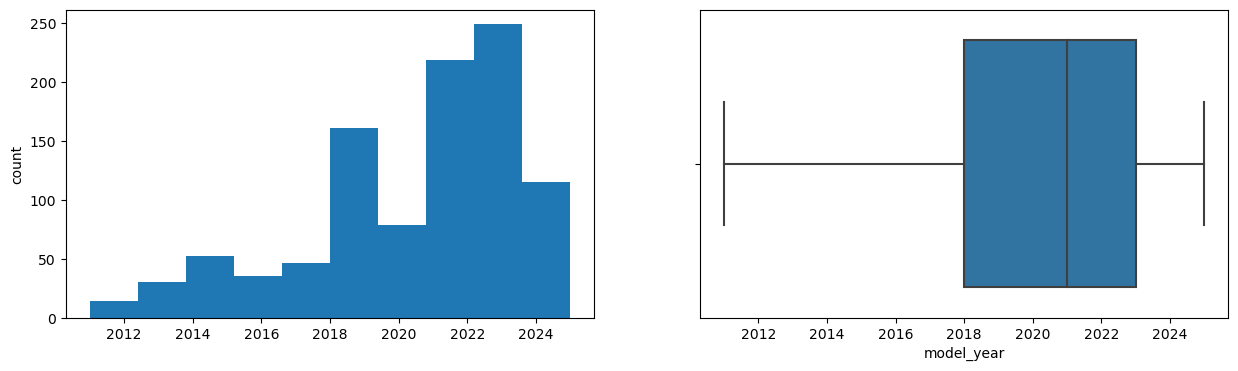

electric_range
Skew : 1.15


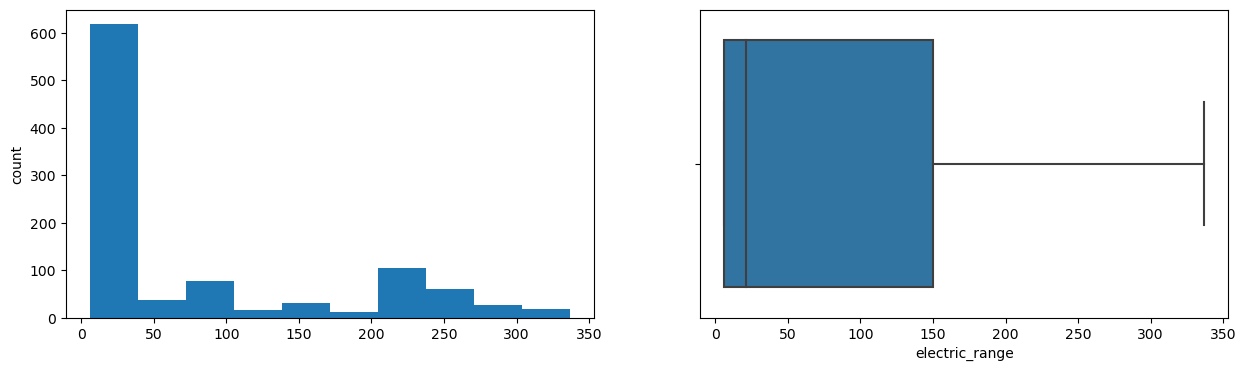

base_msrp
Skew : -5.36


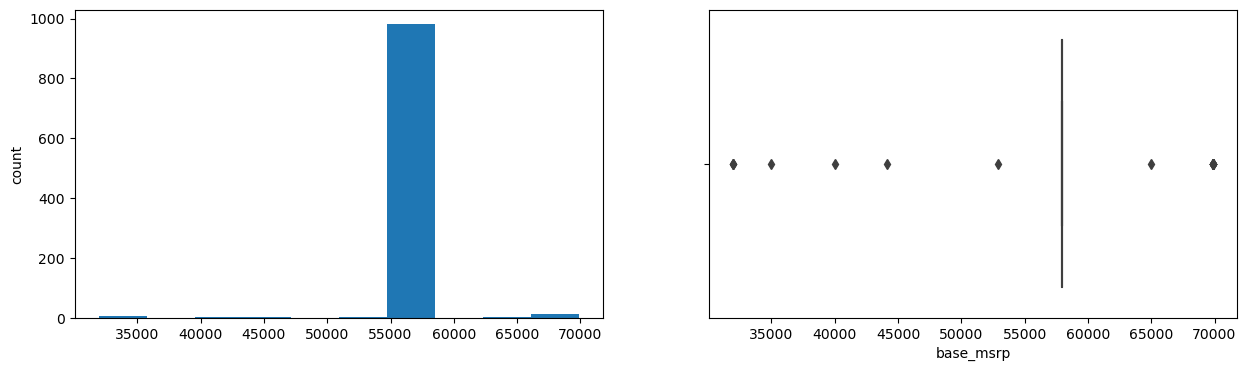

legislative_district
Skew : -0.6


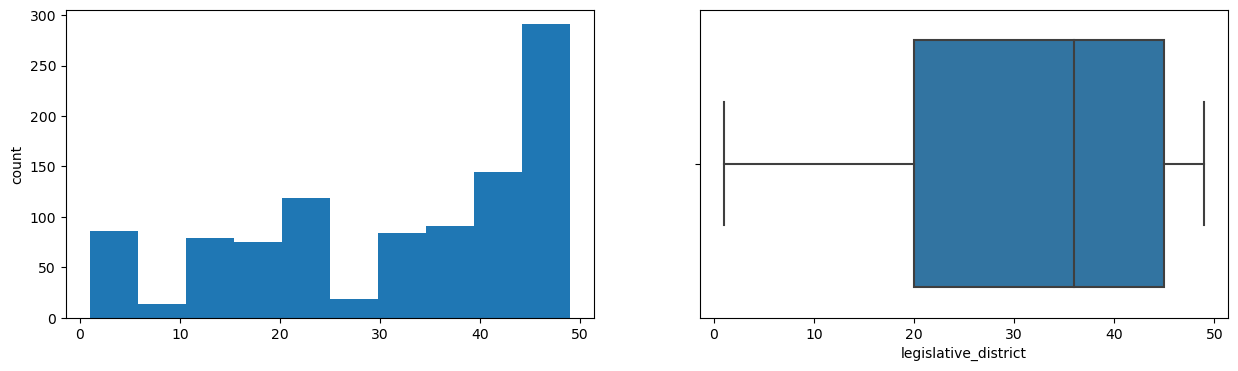

_2020_census_tract
Skew : 0.86


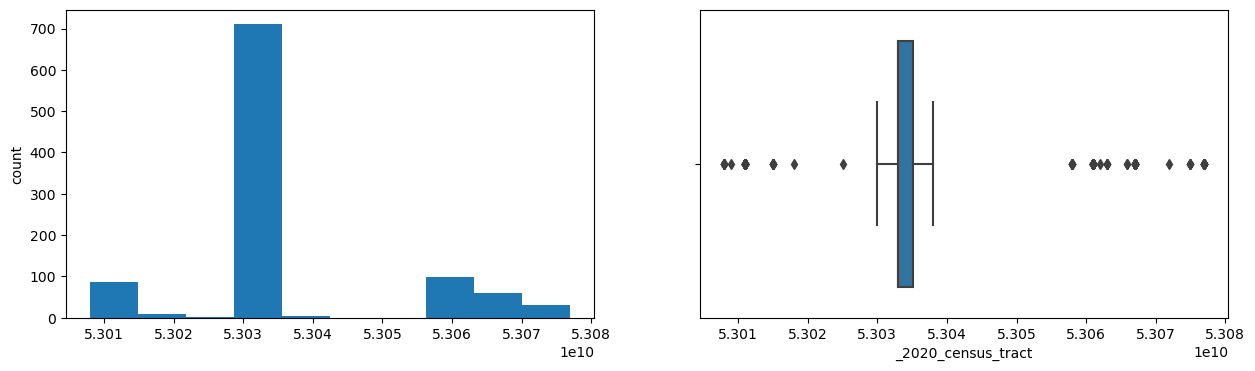

:@computed_region_x4ys_rtnd
Skew : -2.94


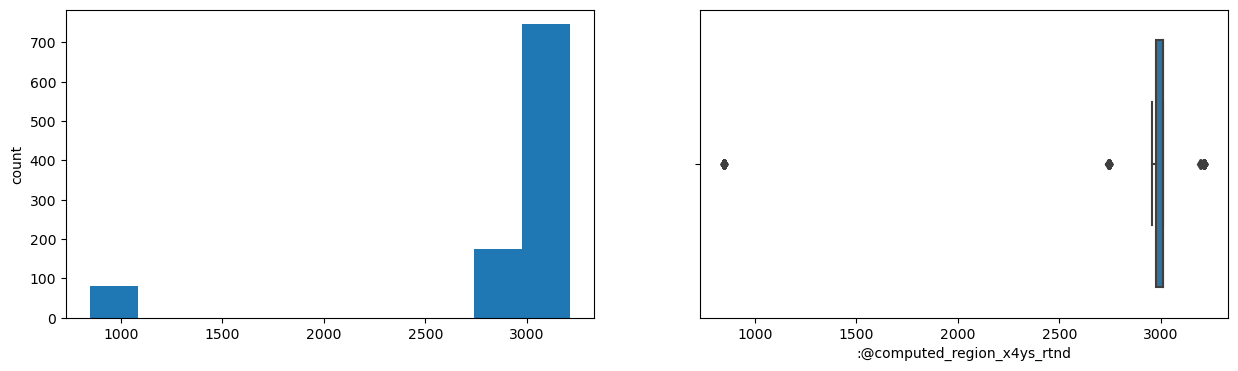

:@computed_region_fny7_vc3j
Skew : -0.27


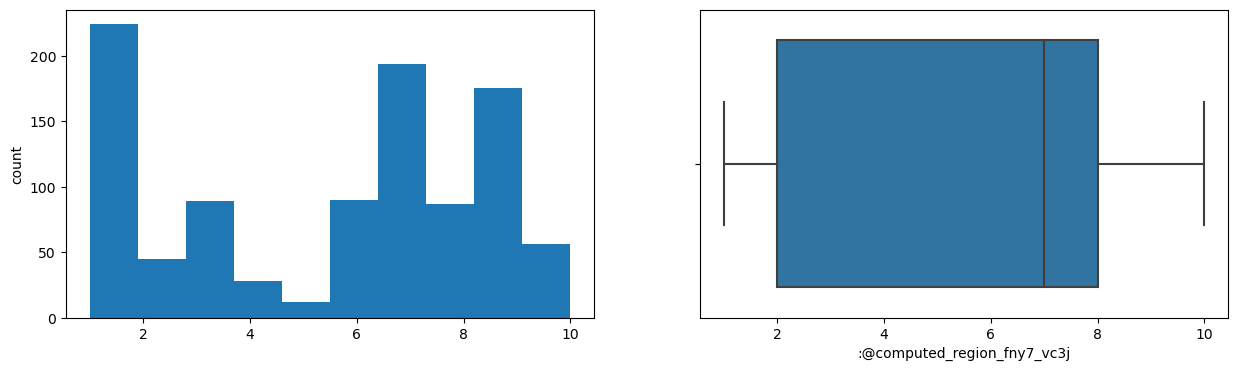

:@computed_region_8ddd_yn5v
Skew : -0.52


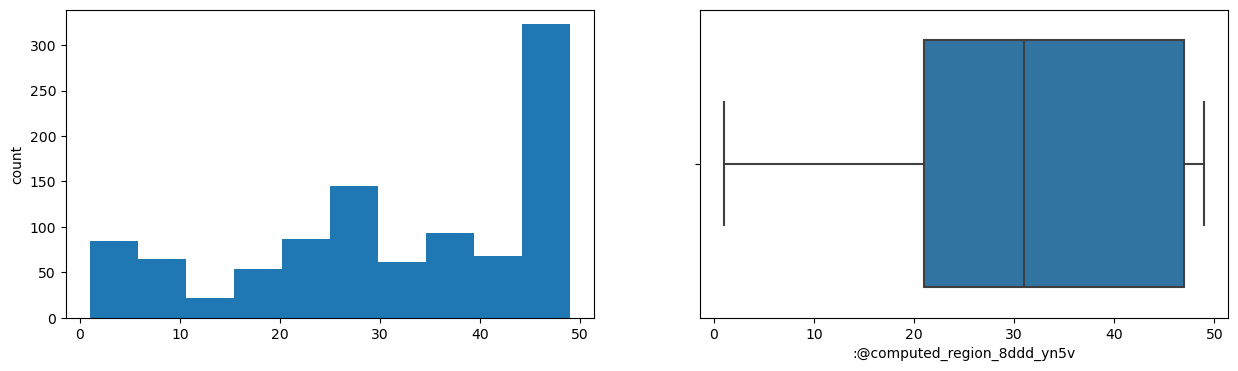

longitude
Skew : 4.89


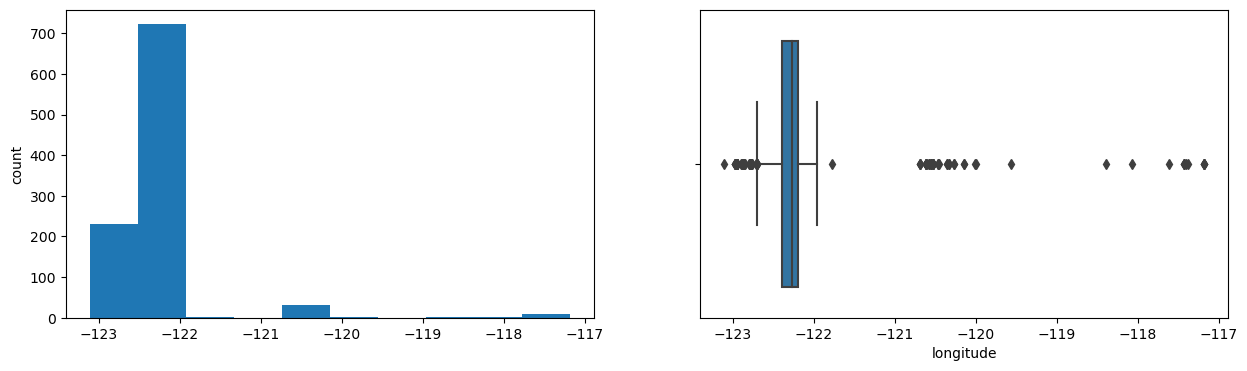

latitude
Skew : -1.96


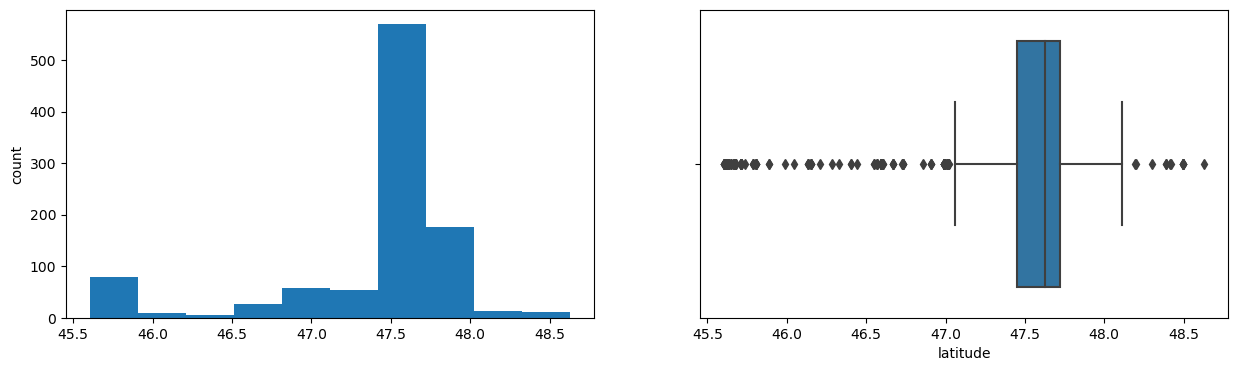

In [115]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

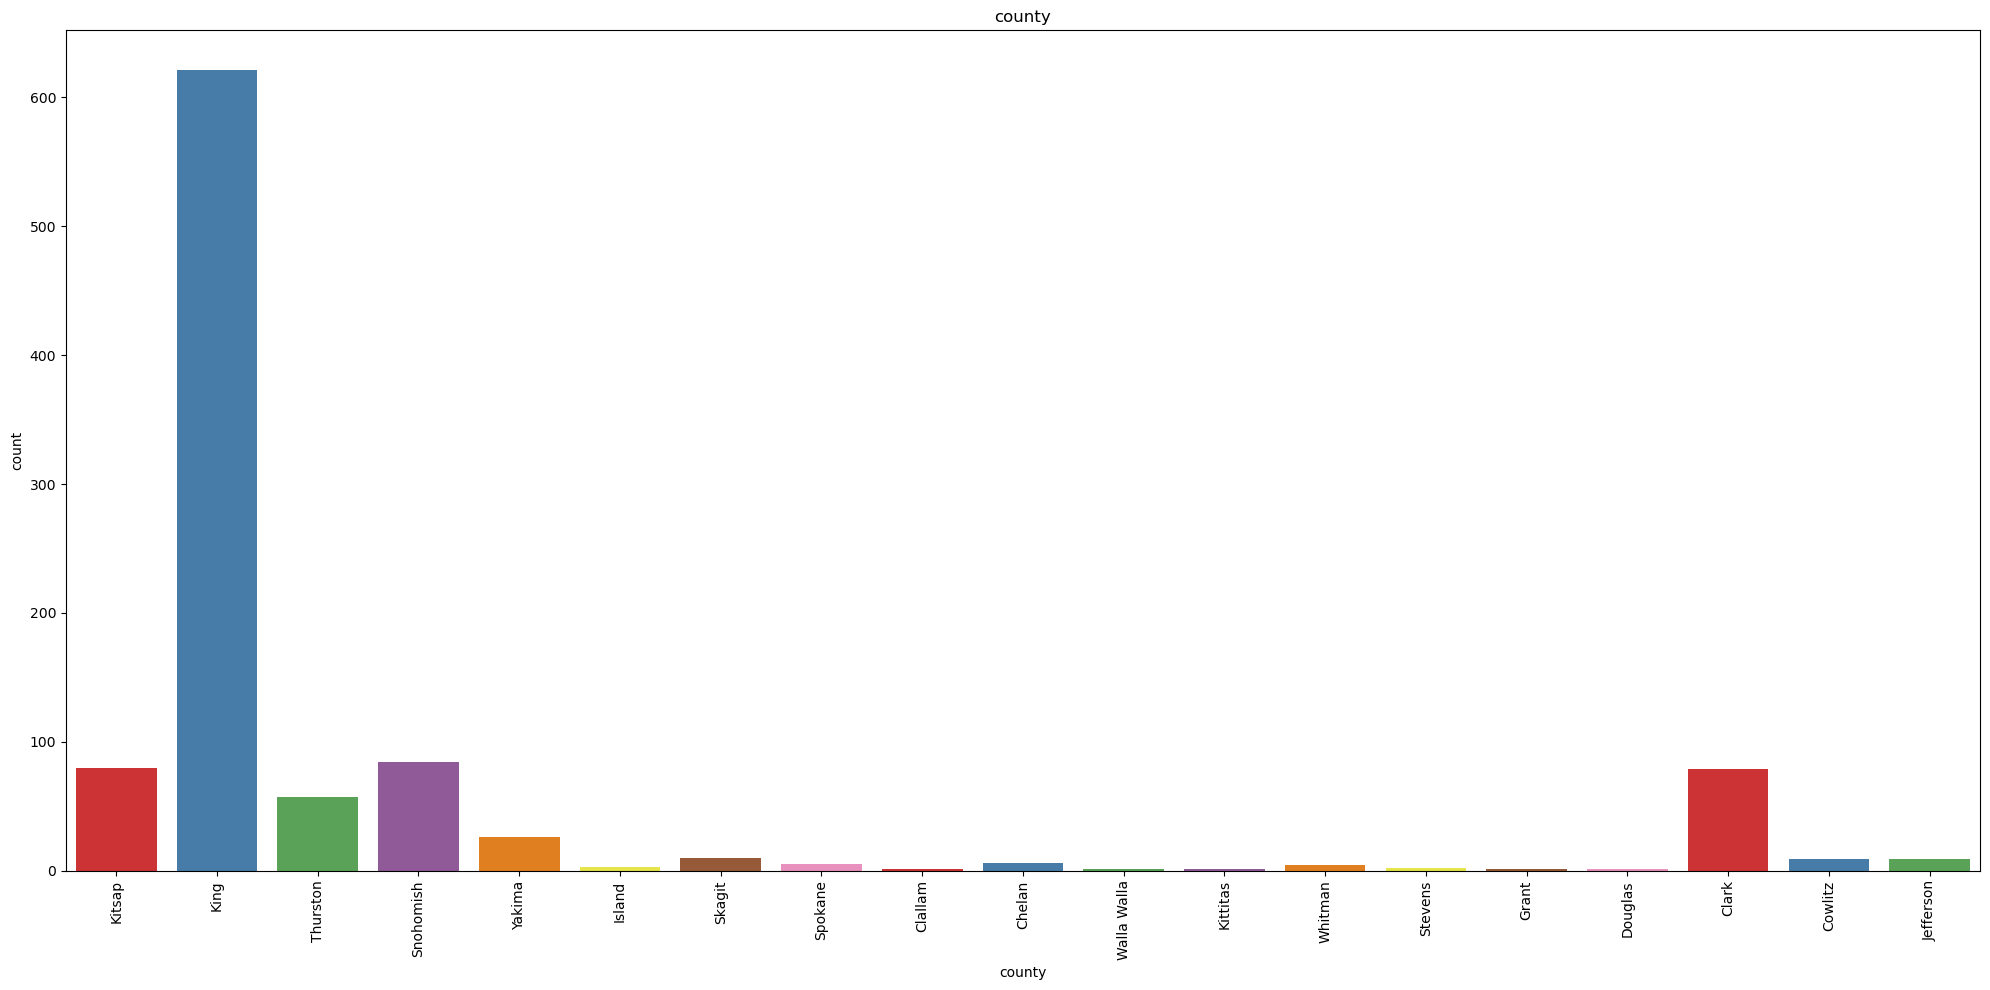

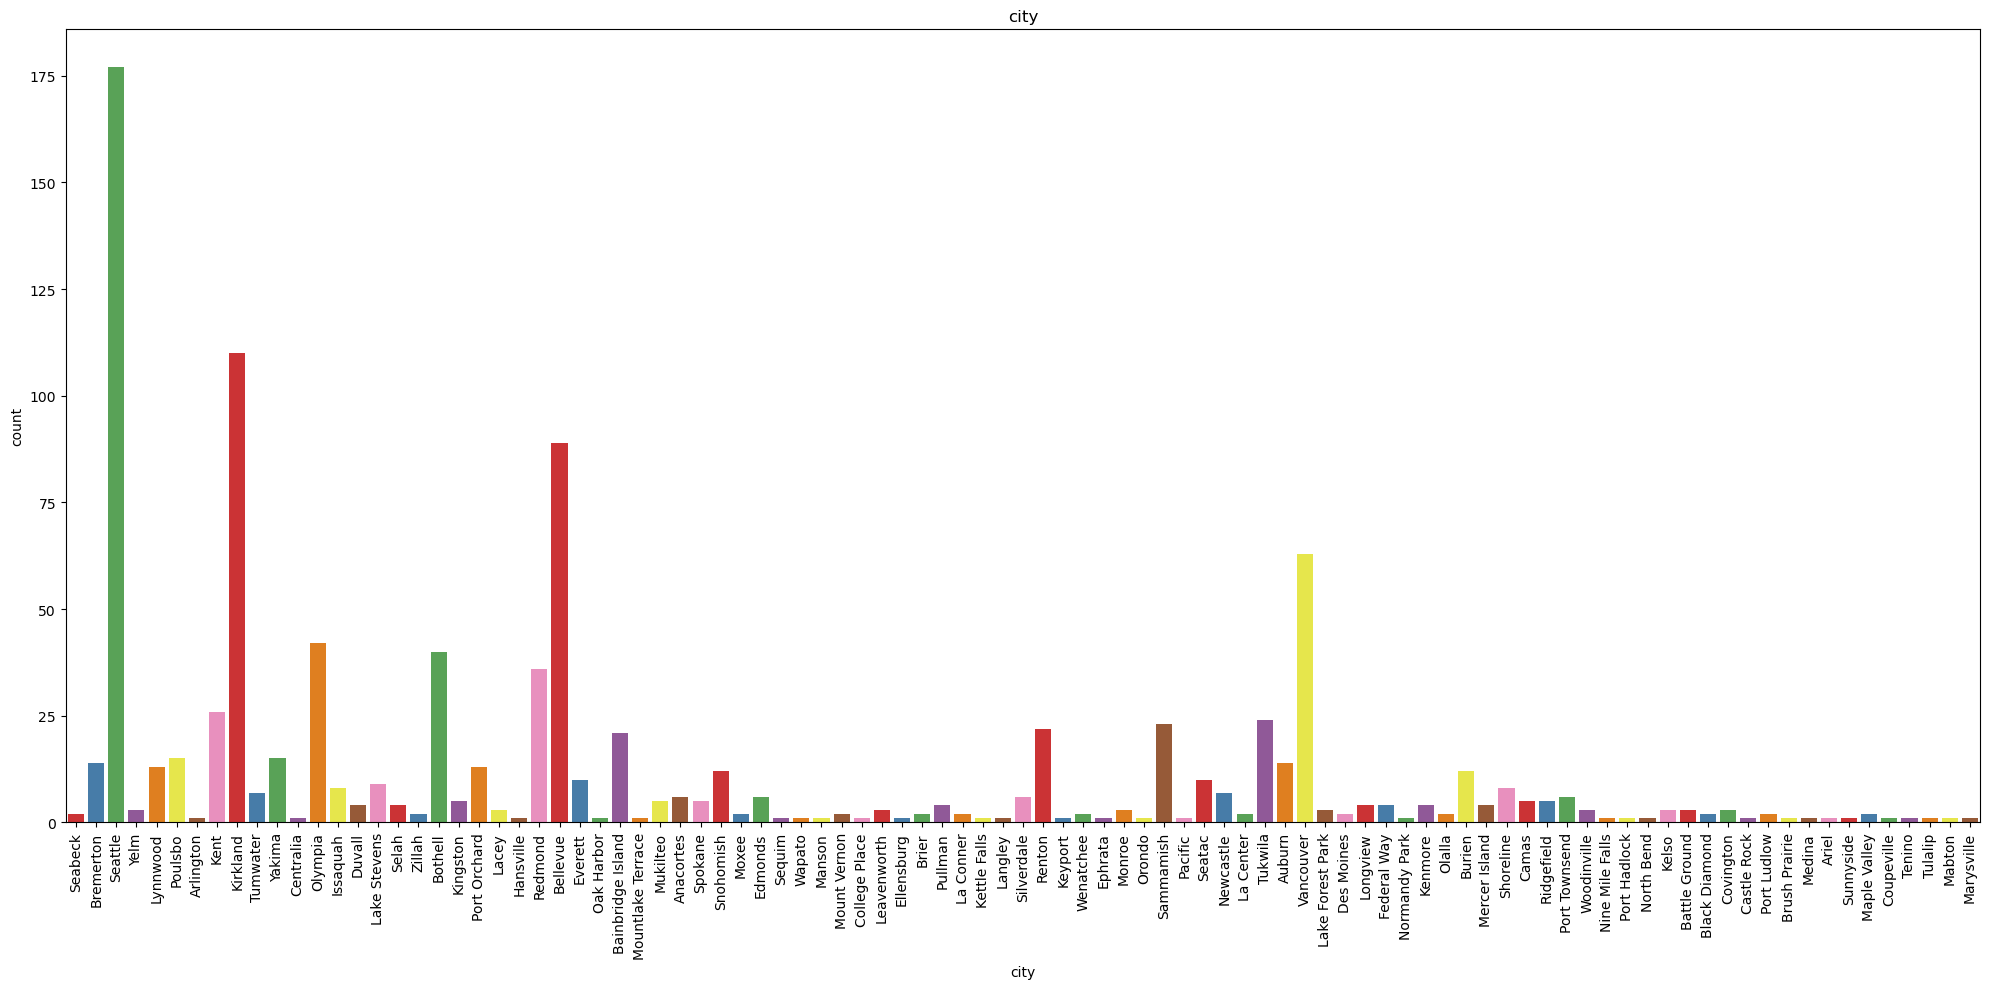

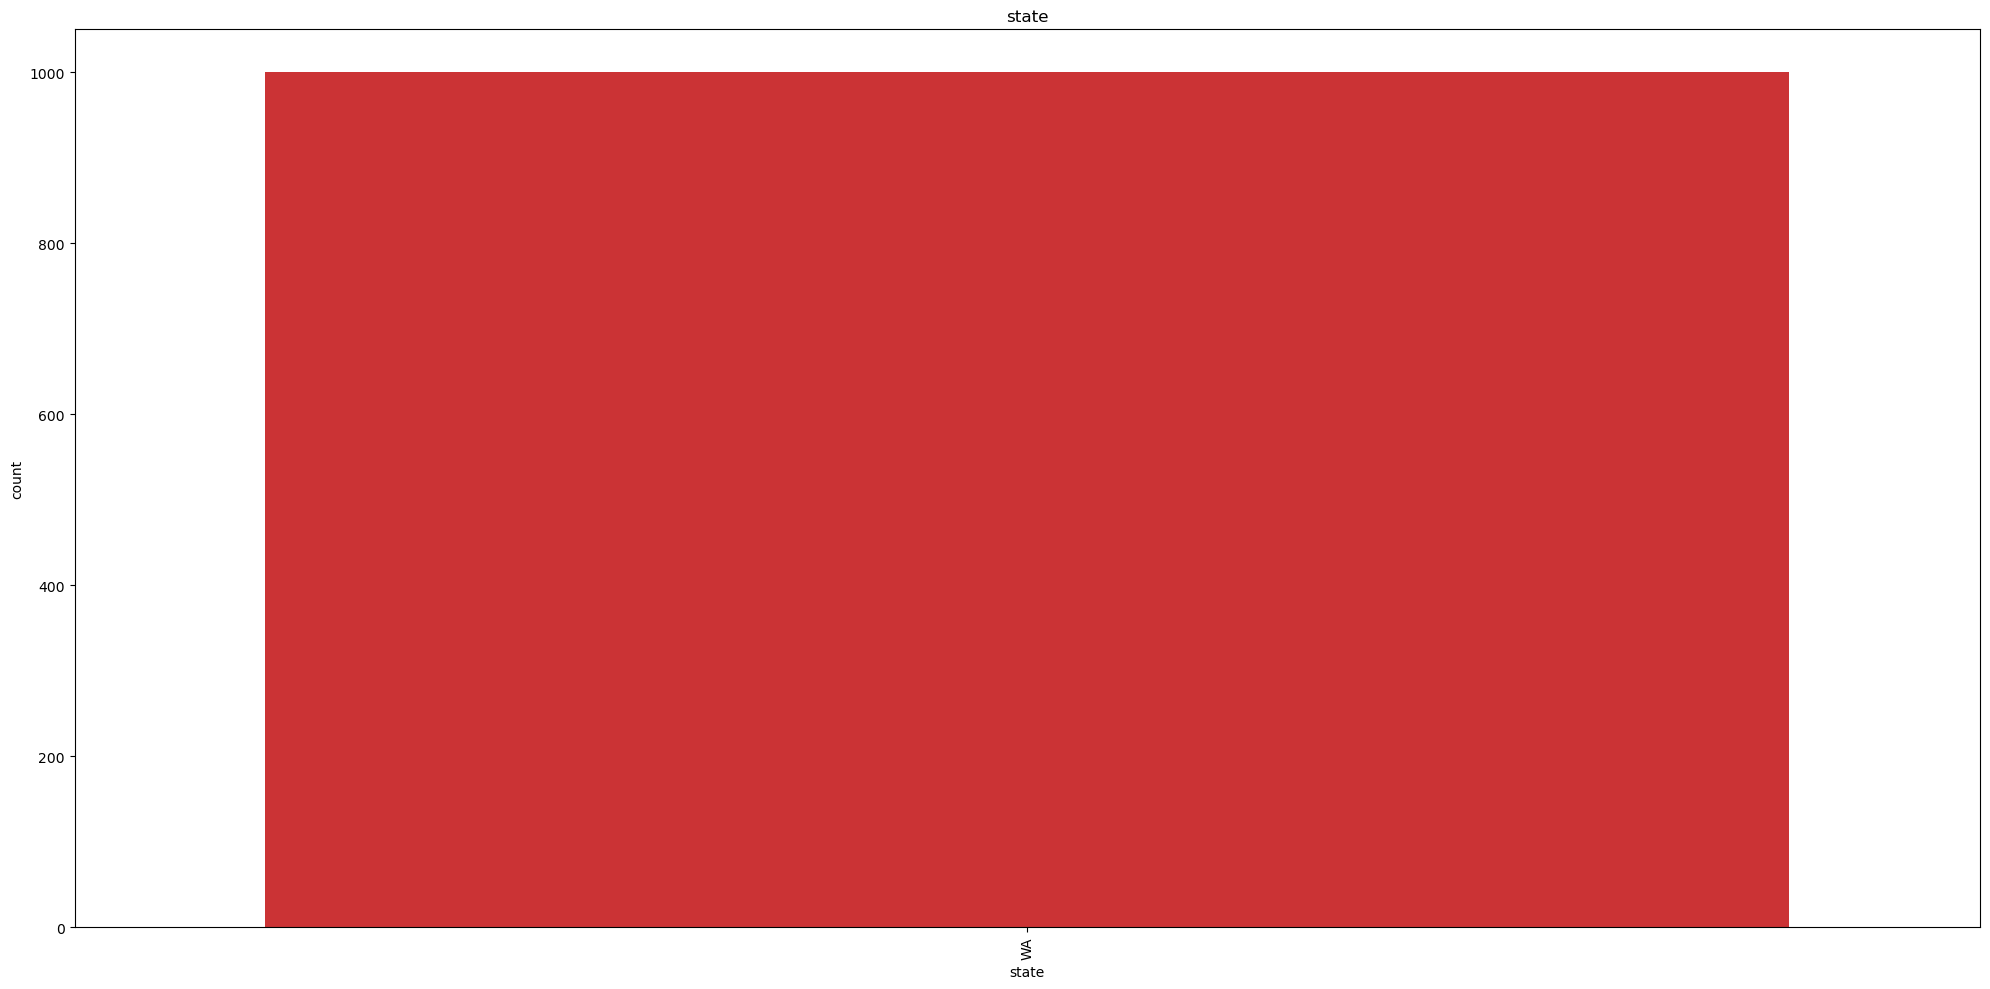

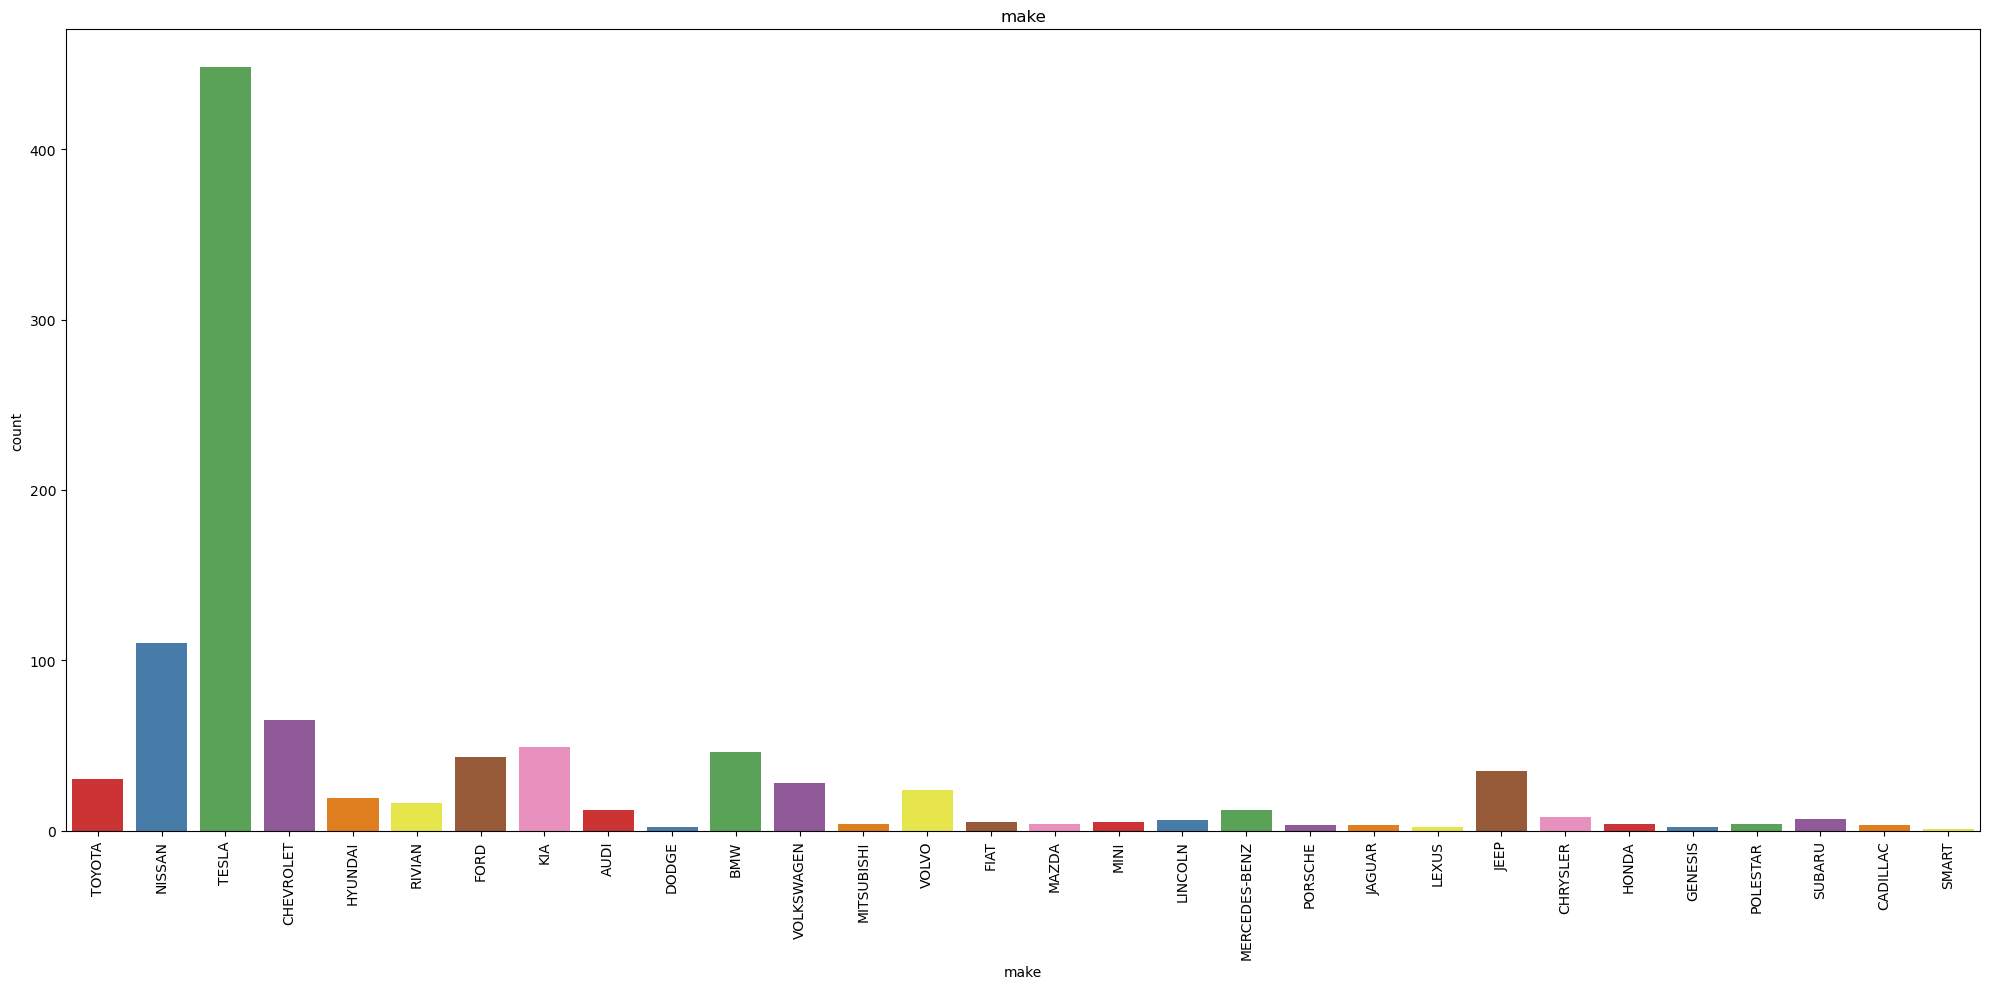

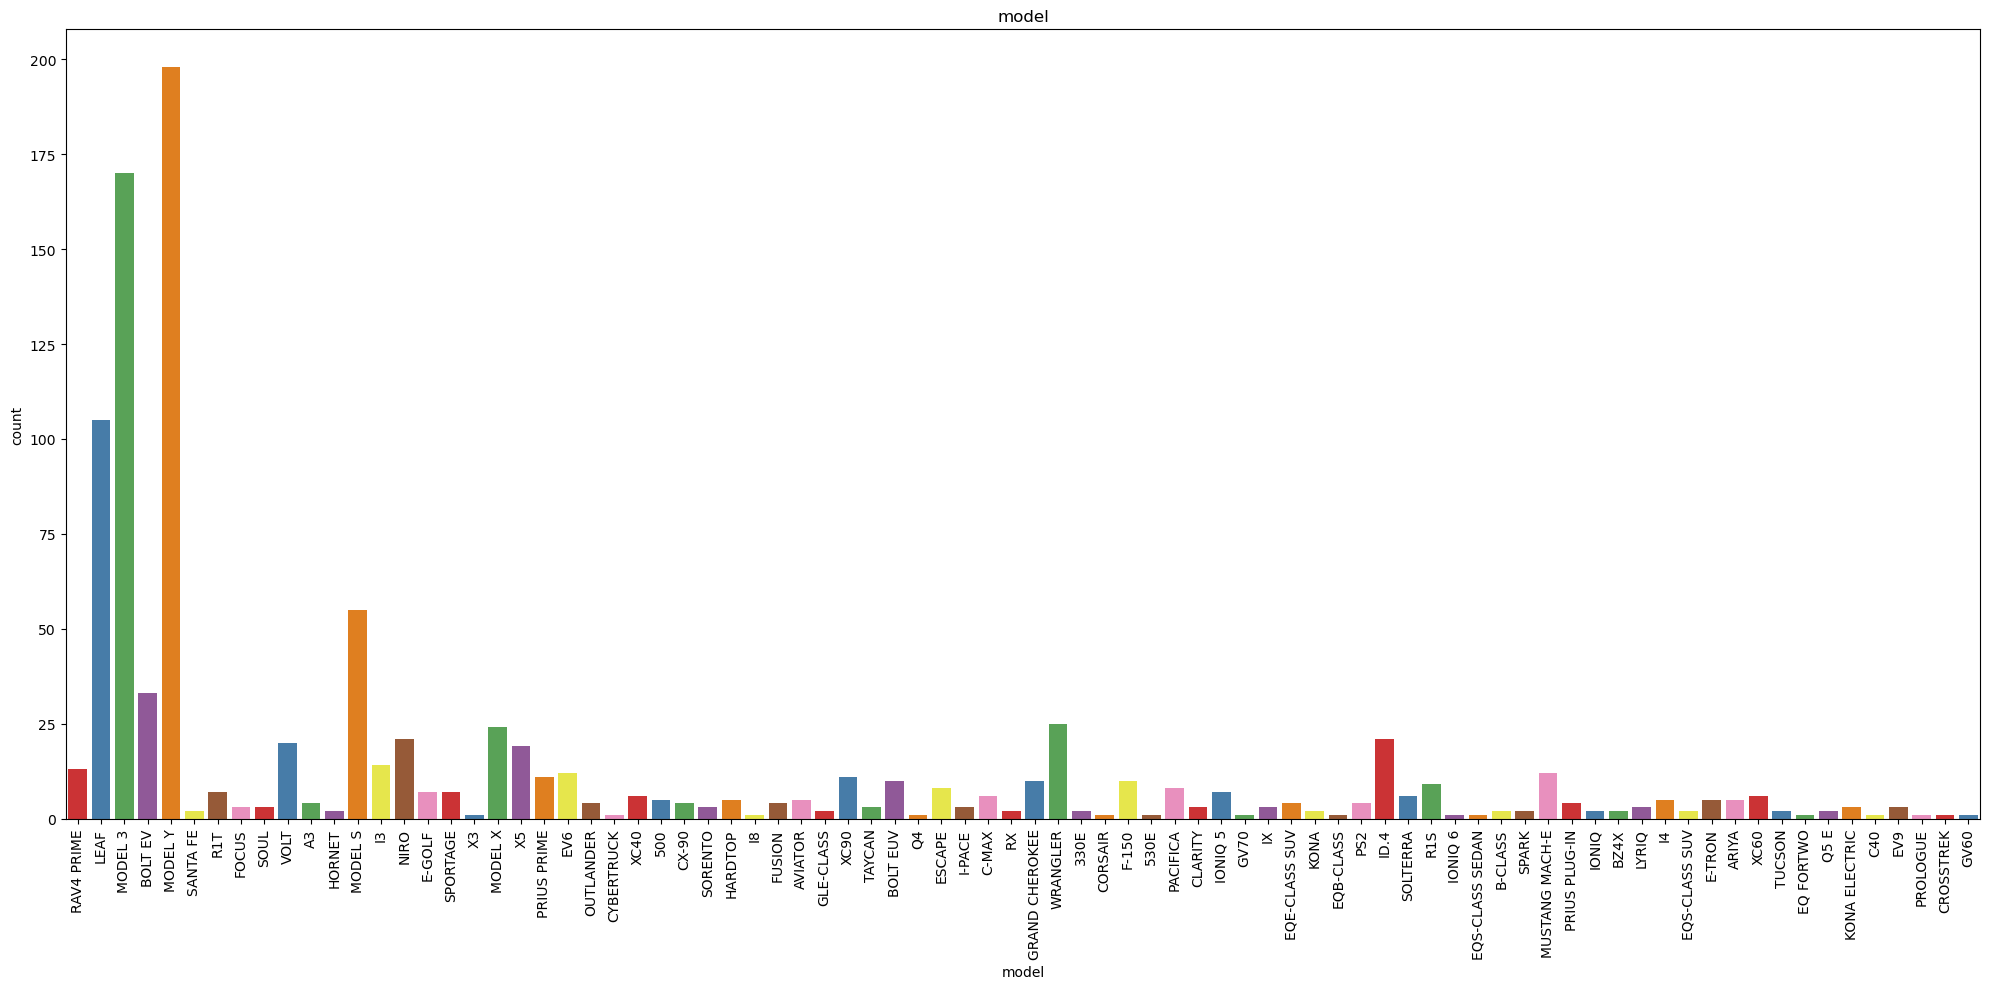

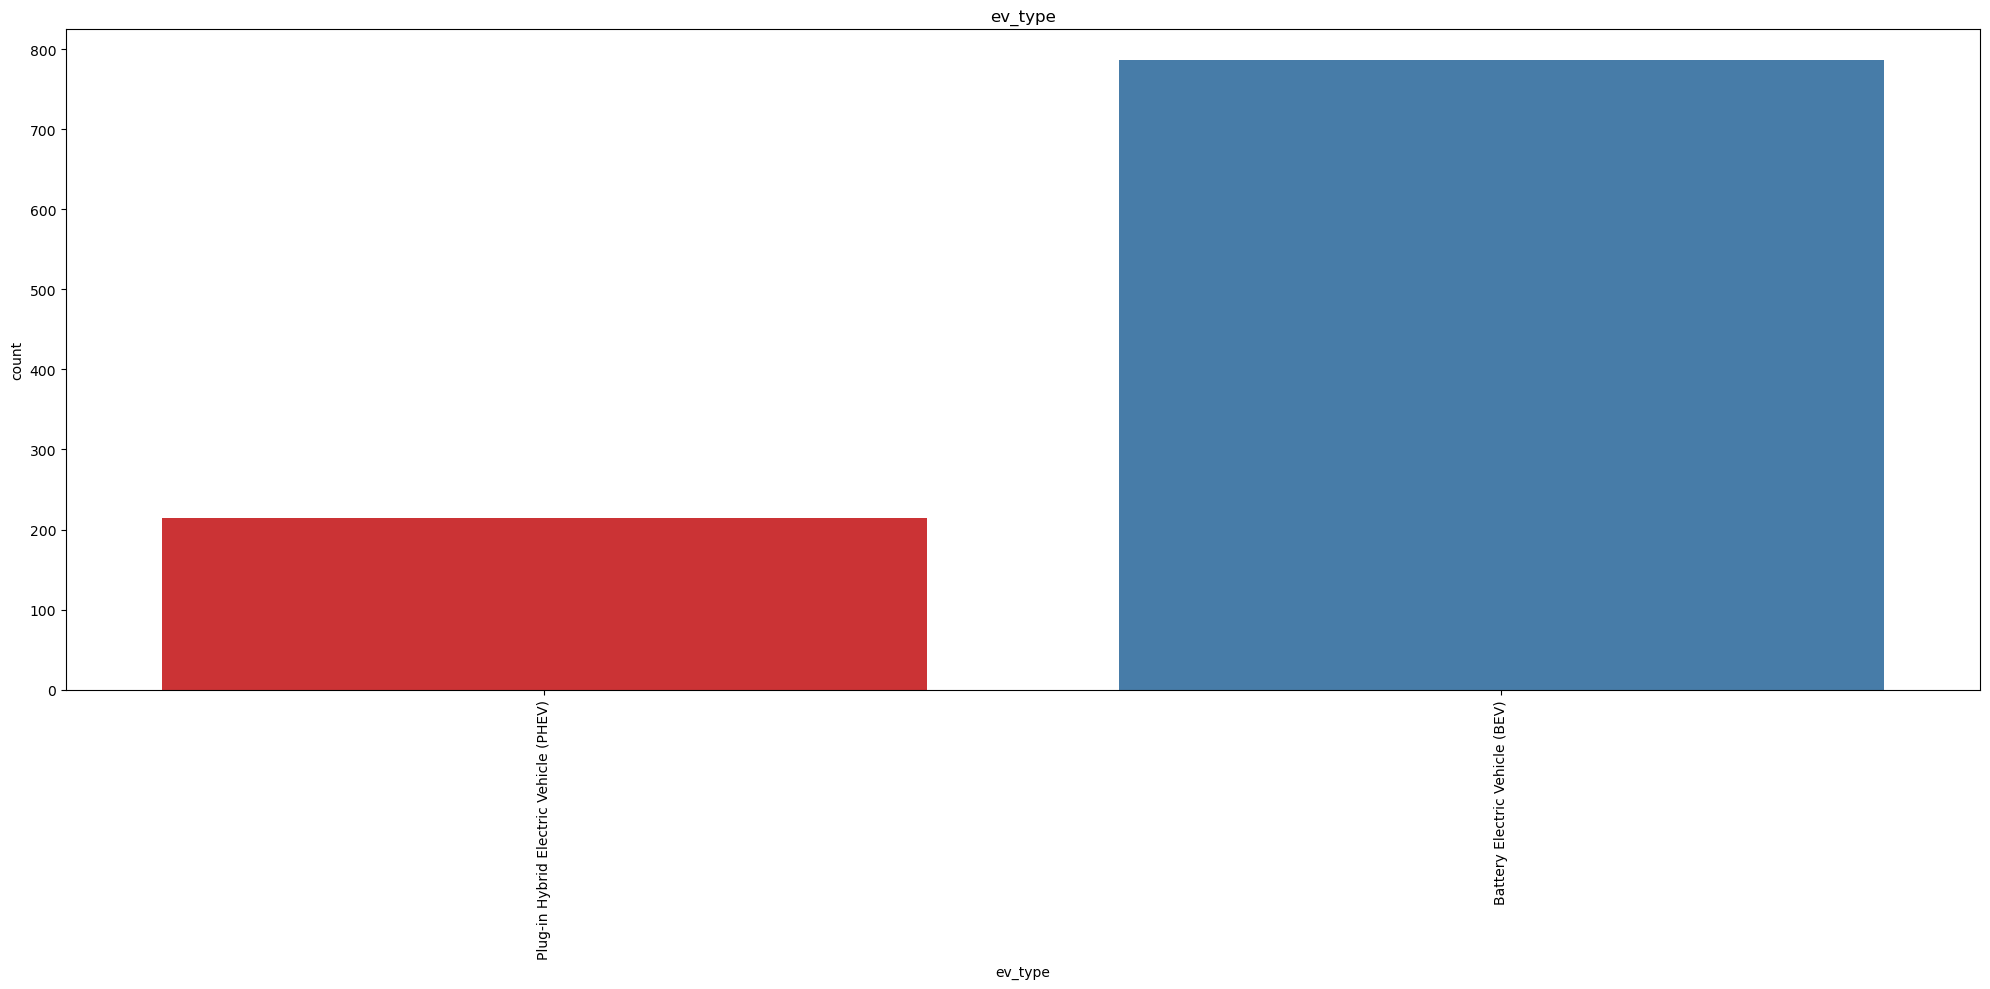

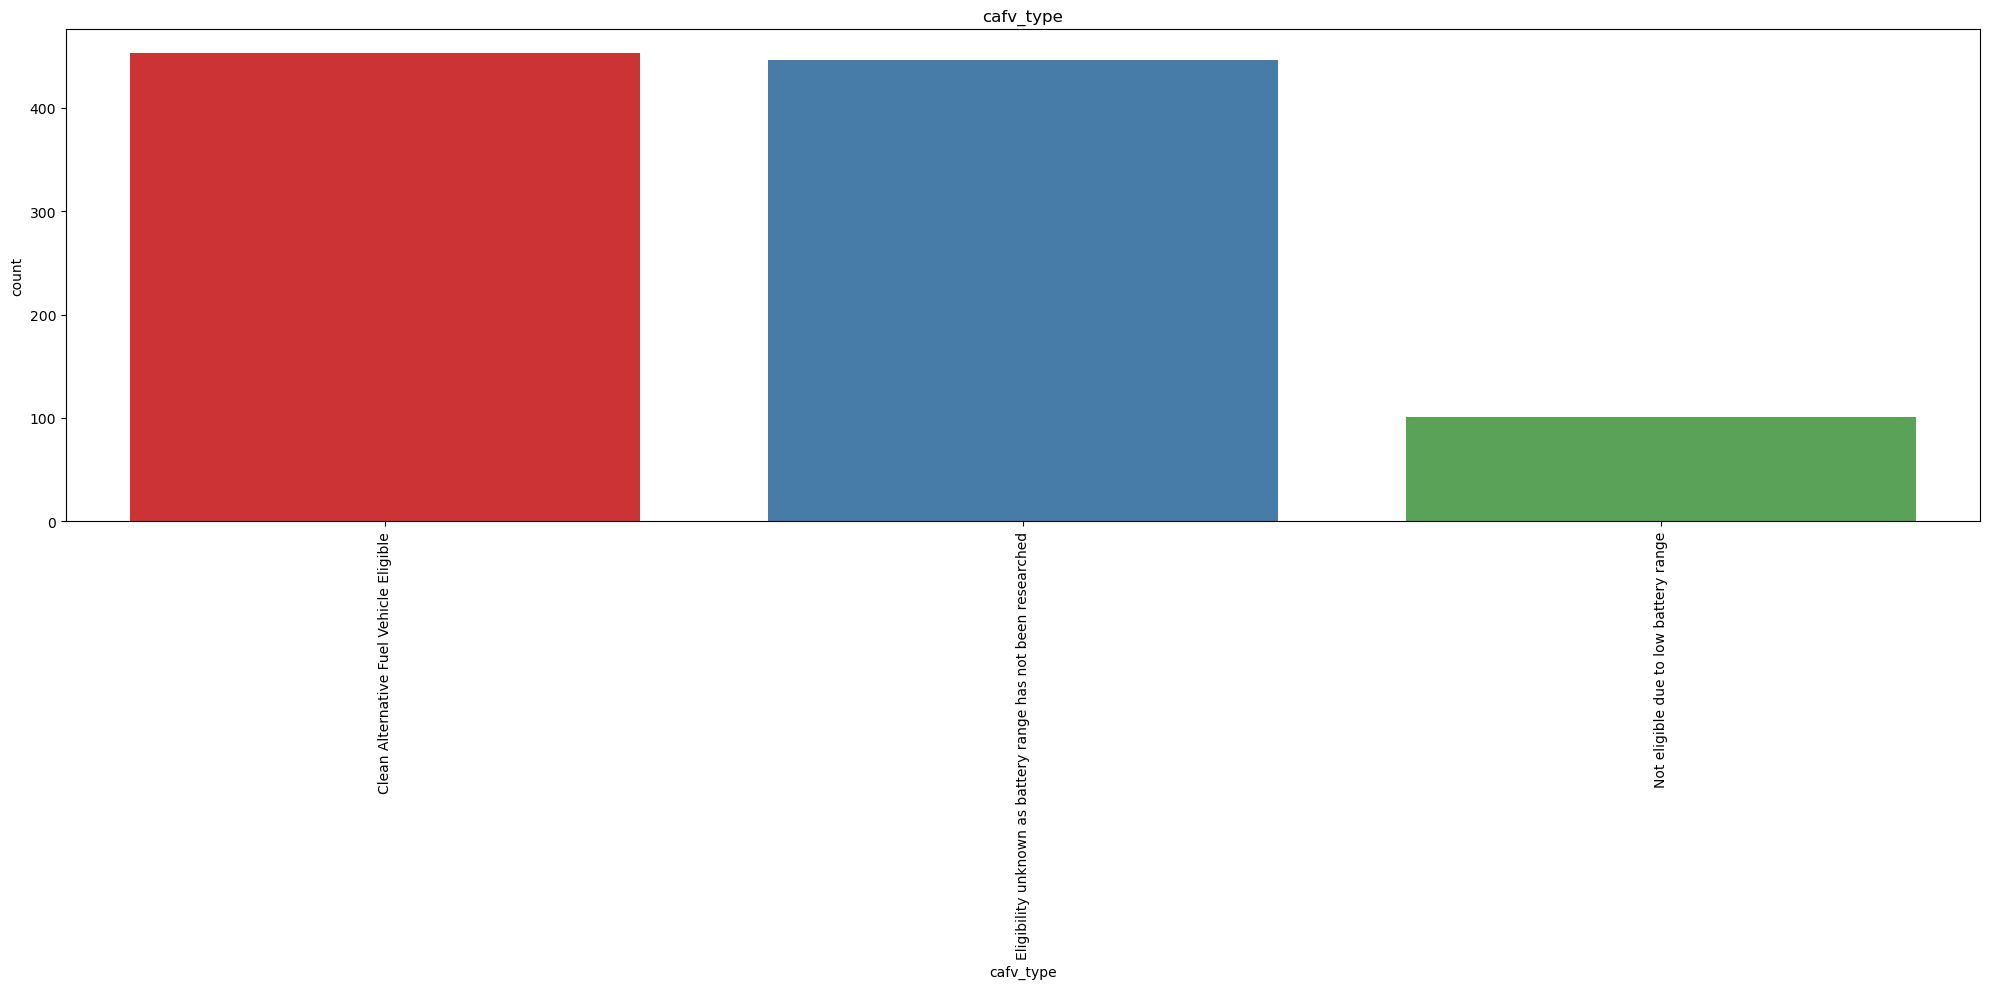

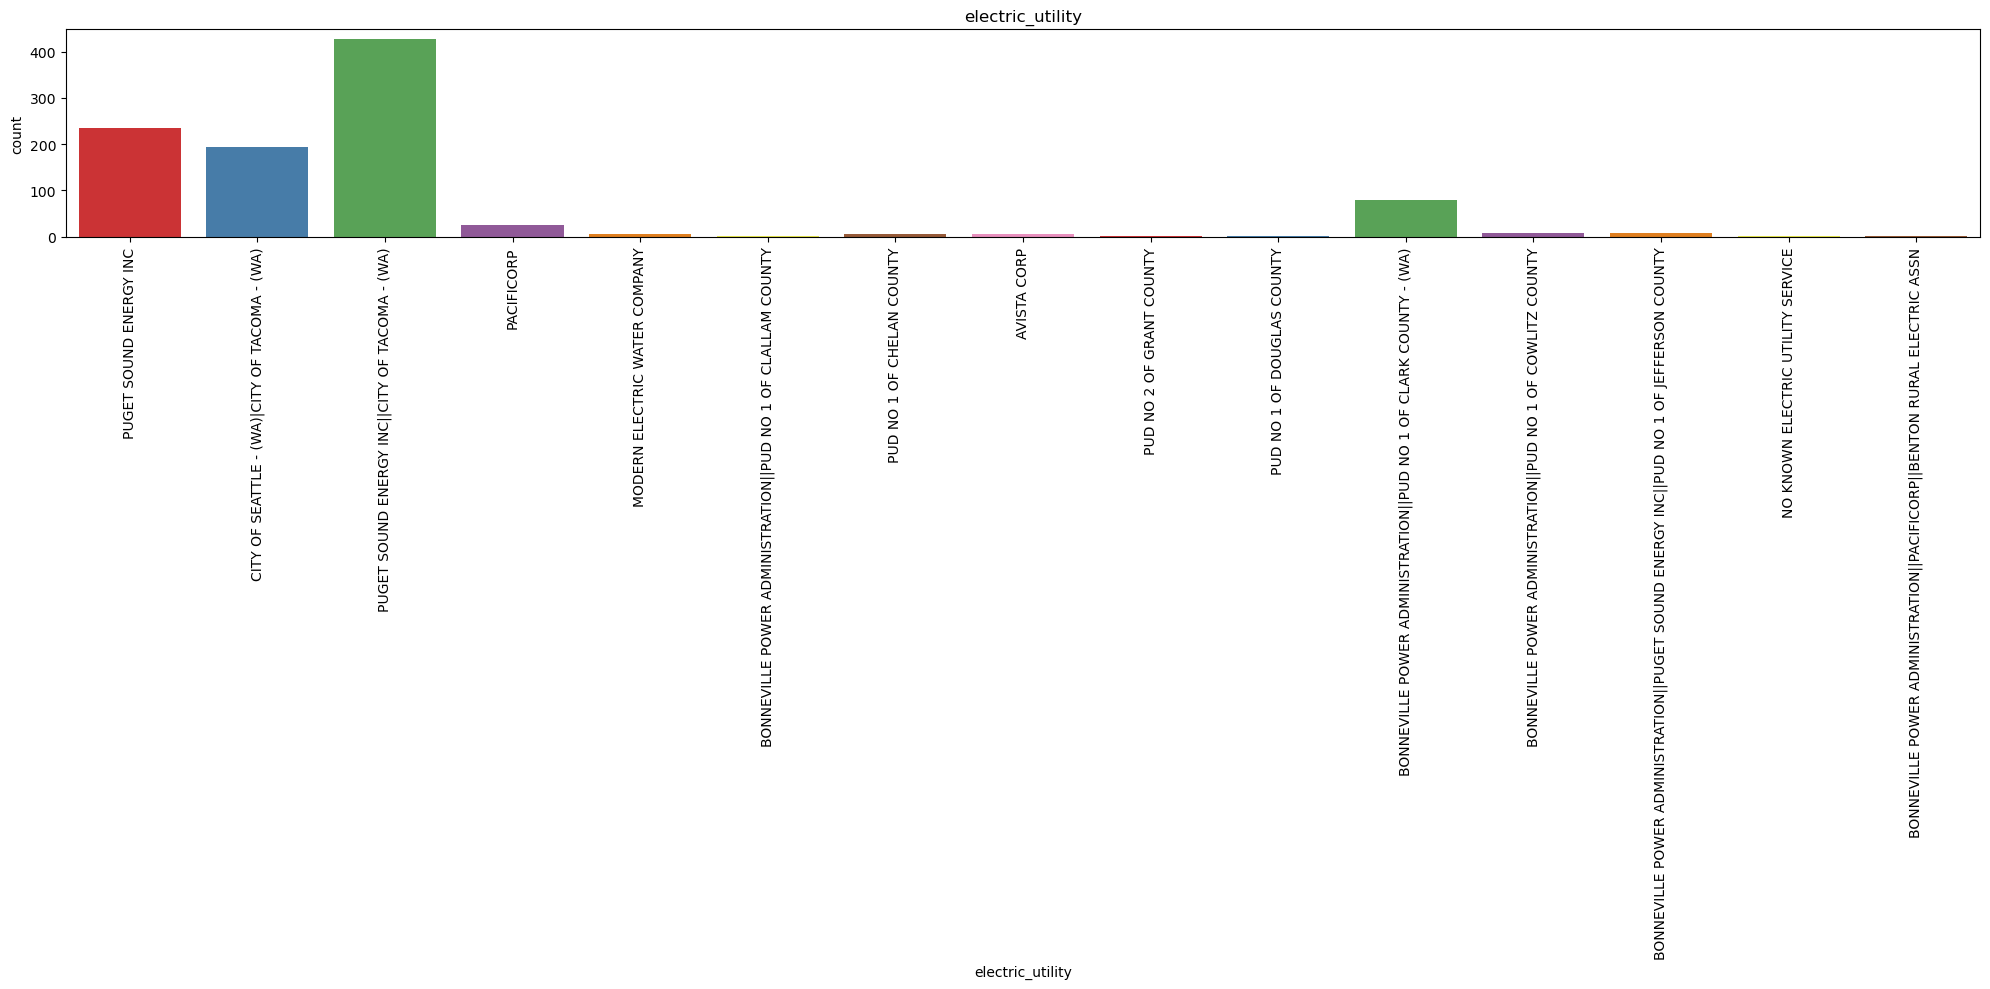

In [116]:
color_palette = sns.color_palette("Set1", len(cat_cols))


for i, column in enumerate(cat_cols, 1):
    plt.figure(figsize=(20, 10))
    sns.countplot(data=df, x=column, palette=color_palette)
    plt.xticks(rotation=90)
    plt.title(column)
    plt.tight_layout()
    plt.show()

We see that the `state` column only has a single value for all records, so we can delete the column

In [117]:
df.drop(labels='state',axis=1,inplace=True)
cat_cols.remove('state')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   county                       1000 non-null   object 
 1   city                         1000 non-null   object 
 2   model_year                   1000 non-null   int64  
 3   make                         1000 non-null   object 
 4   model                        1000 non-null   object 
 5   ev_type                      1000 non-null   object 
 6   cafv_type                    1000 non-null   object 
 7   electric_range               1000 non-null   int64  
 8   base_msrp                    1000 non-null   float64
 9   legislative_district         1000 non-null   int64  
 10  electric_utility             1000 non-null   object 
 11  _2020_census_tract           1000 non-null   int64  
 12  :@computed_region_x4ys_rtnd  1000 non-null   int64  
 13  :@computed_region_f

### 2. Transforming Data

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,1000.0,2.020427e+03,3.158266e+00,2.011000e+03,2.018000e+03,2.021000e+03,2.023000e+03,2.025000e+03
electric_range,1000.0,7.530900e+01,9.625556e+01,6.000000e+00,6.000000e+00,2.100000e+01,1.500000e+02,3.370000e+02
base_msrp,1000.0,5.798368e+04,2.172364e+03,3.195000e+04,5.798368e+04,5.798368e+04,5.798368e+04,6.990000e+04
legislative_district,1000.0,3.137500e+01,1.492344e+01,1.000000e+00,2.000000e+01,3.600000e+01,4.500000e+01,4.900000e+01
_2020_census_tract,1000.0,5.303719e+10,1.525283e+07,5.300796e+10,5.303301e+10,5.303302e+10,5.303509e+10,5.307700e+10
:@computed_region_x4ys_rtnd,1000.0,2.830074e+03,5.936668e+02,8.480000e+02,2.977000e+03,3.009000e+03,3.009000e+03,3.214000e+03
:@computed_region_fny7_vc3j,1000.0,5.482000e+00,3.162226e+00,1.000000e+00,2.000000e+00,7.000000e+00,8.000000e+00,1.000000e+01
:@computed_region_8ddd_yn5v,1000.0,3.150200e+01,1.523319e+01,1.000000e+00,2.100000e+01,3.100000e+01,4.700000e+01,4.900000e+01
longitude,1000.0,-1.222160e+02,6.694808e-01,-1.231091e+02,-1.223949e+02,-1.222717e+02,-1.221926e+02,-1.171771e+02
latitude,1000.0,4.741828e+01,6.001258e-01,4.560469e+01,4.744834e+01,4.762597e+01,4.772105e+01,4.863080e+01


I am the type of person who wants to maximize something, so for the model that I create later in Clustering all data will be utilized so we need to change categorical data into numerical form

As long as we have the Mean and Standard Deviation values, we can carry out transformations on numerical data using a standard scaler that applies a normal distribution

In [120]:
df_T = pd.DataFrame()
scaler = StandardScaler()

In [121]:
le = LabelEncoder()
for cat_col in cat_cols:
    df_T[f"{cat_col}_T"] = le.fit_transform(df[cat_col])

In [122]:
df_T.head()

,county_T,city_T,make_T,model_T,ev_type_T,cafv_type_T,electric_utility_T
0,9,74,27,65,1,0,13
1,9,9,20,47,0,0,13
2,8,76,26,49,0,0,6
3,8,76,20,47,0,0,6
4,15,93,3,8,0,0,13


In [123]:

df_T[['model_year_T',
    'electric_range_T',
    'base_msrp_T',
    'legislative_district_T',
    '_2020_census_tract_T',
    ':@computed_region_x4ys_rtnd_T',
    ':@computed_region_fny7_vc3j_T',
    ':@computed_region_8ddd_yn5v_T',
    'longitude_T',
    'latitude_T']] = scaler.fit_transform(
    df[['model_year',
    'electric_range',
    'base_msrp',
    'legislative_district',
    '_2020_census_tract',
    ':@computed_region_x4ys_rtnd',
    ':@computed_region_fny7_vc3j',
    ':@computed_region_8ddd_yn5v',
    'longitude',
    'latitude']])
df_T[['county_T','city_T','make_T','model_T','ev_type_T','cafv_type_T','electric_utility_T']] = scaler.fit_transform(df_T[['county_T','city_T','make_T','model_T','ev_type_T','cafv_type_T','electric_utility_T']])

In [124]:
df_T.head()

,county_T,city_T,make_T,model_T,ev_type_T,cafv_type_T,electric_utility_T,model_year_T,electric_range_T,base_msrp_T,legislative_district_T,_2020_census_tract_T,:@computed_region_x4ys_rtnd_T,:@computed_region_fny7_vc3j_T,:@computed_region_8ddd_yn5v_T,longitude_T,latitude_T
0,0.124767,0.795627,0.848183,1.019144,1.91648,-0.98808,0.524067,0.815095,-0.346221,3.351003e-15,0.243028,-0.137434,-3.340368,0.163891,0.492461,-0.981600,0.269327
1,0.124767,-1.398600,0.071154,-0.026847,-0.52179,-0.98808,0.524067,-0.768844,0.786748,3.351003e-15,0.243028,-0.138129,-3.340368,0.163891,0.492461,-0.717512,0.262872
2,-0.181034,0.863141,0.737179,0.089374,-0.52179,-0.98808,-1.198218,-0.135268,1.982082,3.351003e-15,0.779366,-0.274133,0.301542,0.480282,-1.806303,-0.176463,0.319510
3,-0.181034,0.863141,0.071154,-0.026847,-0.52179,-0.98808,-1.198218,-2.035996,0.090336,3.351003e-15,0.980492,-0.274566,0.301542,0.480282,1.083572,-0.132043,0.495789
4,1.959575,1.437016,-1.815918,-2.293161,-0.52179,-0.98808,0.524067,-1.085632,1.691044,3.351003e-15,-0.762605,1.956418,-0.148430,1.429455,-1.937661,-0.531388,-0.848082


In [125]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   county_T                       1000 non-null   float64
 1   city_T                         1000 non-null   float64
 2   make_T                         1000 non-null   float64
 3   model_T                        1000 non-null   float64
 4   ev_type_T                      1000 non-null   float64
 5   cafv_type_T                    1000 non-null   float64
 6   electric_utility_T             1000 non-null   float64
 7   model_year_T                   1000 non-null   float64
 8   electric_range_T               1000 non-null   float64
 9   base_msrp_T                    1000 non-null   float64
 10  legislative_district_T         1000 non-null   float64
 11  _2020_census_tract_T           1000 non-null   float64
 12  :@computed_region_x4ys_rtnd_T  1000 non-null   fl

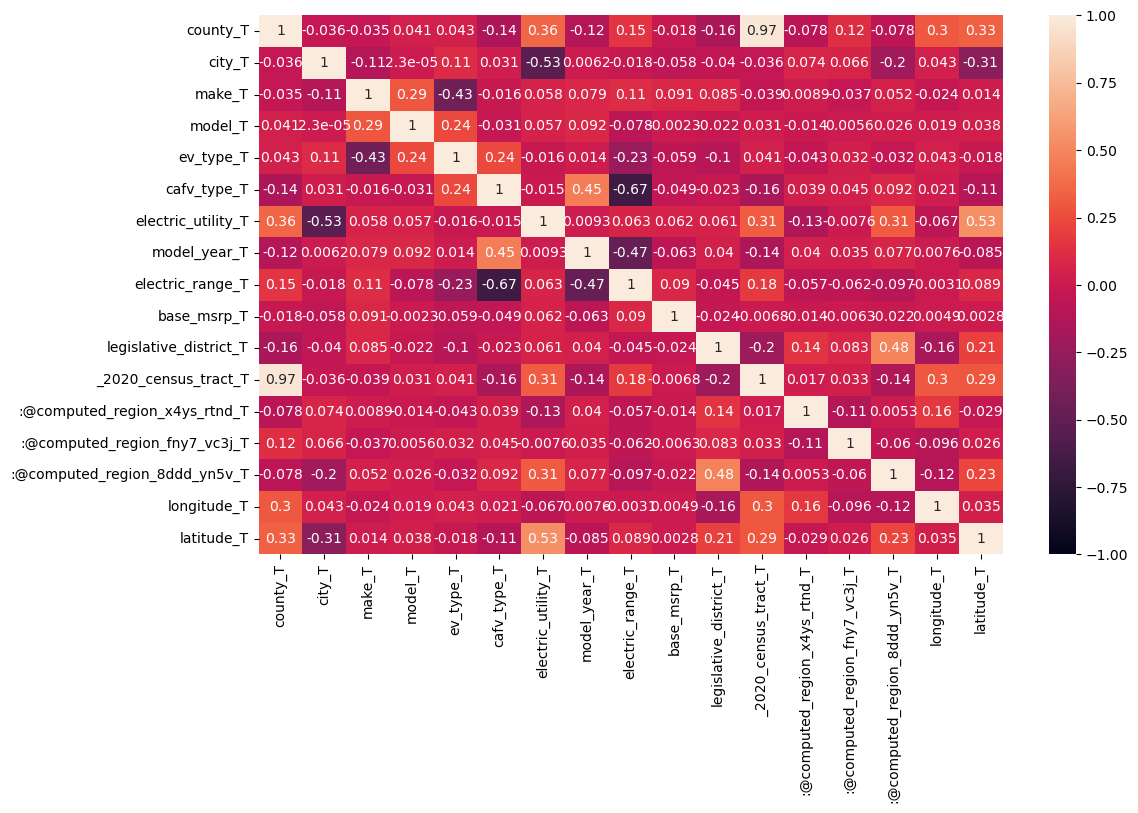

In [126]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_T.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### 3.K Means Clustering

In [127]:
wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df_T)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_T, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [14972.70222899281]
silhoutte score for n_clusters = 2 is 0.14791722483089742
wcss score for n_cluster = 3 is [14972.70222899281, 13420.17093465637]
silhoutte score for n_clusters = 3 is 0.21138838512723548
wcss score for n_cluster = 4 is [14972.70222899281, 13420.17093465637, 11876.439840041992]
silhoutte score for n_clusters = 4 is 0.19794382701845836
wcss score for n_cluster = 5 is [14972.70222899281, 13420.17093465637, 11876.439840041992, 11008.370550702271]
silhoutte score for n_clusters = 5 is 0.21701489909957844
wcss score for n_cluster = 6 is [14972.70222899281, 13420.17093465637, 11876.439840041992, 11008.370550702271, 10293.91569047058]
silhoutte score for n_clusters = 6 is 0.20821174655890434
wcss score for n_cluster = 7 is [14972.70222899281, 13420.17093465637, 11876.439840041992, 11008.370550702271, 10293.91569047058, 9717.644752448692]
silhoutte score for n_clusters = 7 is 0.1907736978395348
wcss score for n_cluster = 8 is [14972.7022289928

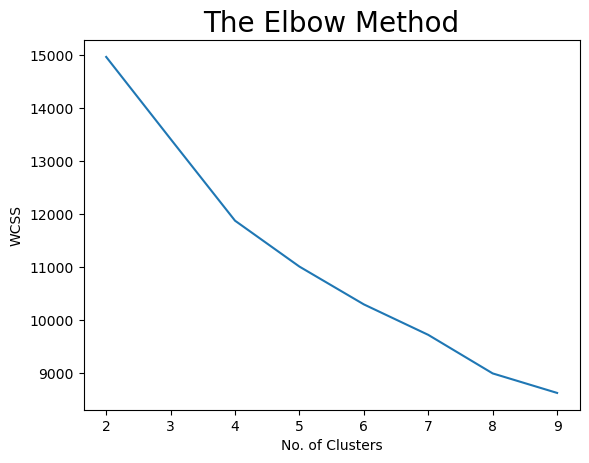

In [128]:
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

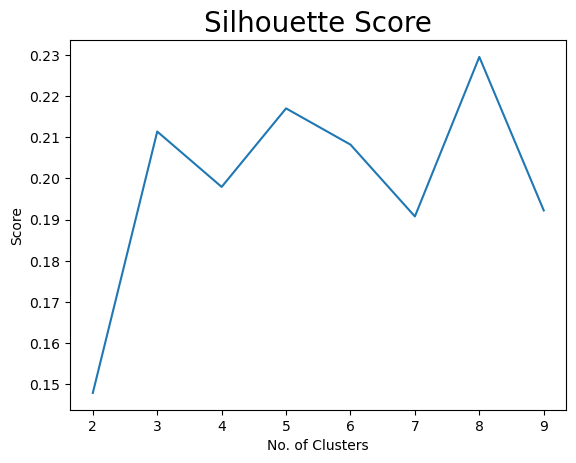

In [129]:
# Visualisasi Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

From the Elbow and Silhouette Score we will choose the size k = 3

In [130]:
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(df_T)
df['Cluster'] = y_kmeans
df.head()

,county,city,model_year,make,model,ev_type,cafv_type,electric_range,base_msrp,legislative_district,electric_utility,_2020_census_tract,:@computed_region_x4ys_rtnd,:@computed_region_fny7_vc3j,:@computed_region_8ddd_yn5v,longitude,latitude,Cluster
0,Kitsap,Seabeck,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,57983.684211,35,PUGET SOUND ENERGY INC,53035091301,848,6,39,-122.872833,47.579830,1
1,Kitsap,Bremerton,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,57983.684211,35,PUGET SOUND ENERGY INC,53035080700,848,6,39,-122.696120,47.575958,1
2,King,Seattle,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,57983.684211,43,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007302,3009,7,4,-122.334080,47.609932,1
3,King,Seattle,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,57983.684211,46,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000700,3009,7,48,-122.304356,47.715668,1
4,Thurston,Yelm,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,57983.684211,20,PUGET SOUND ENERGY INC,53067012510,2742,10,2,-122.571576,46.909580,0


In [131]:
trace1 = go.Scatter3d(
    x=df_T[y_kmeans == 0].iloc[:, 0],
    y=df_T[y_kmeans == 0].iloc[:, 1],
    z=df_T[y_kmeans == 0].iloc[:, 3],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    name='Cluster 1'
)

trace2 = go.Scatter3d(
    x=df_T[y_kmeans == 1].iloc[:, 0],
    y=df_T[y_kmeans == 1].iloc[:, 1],
    z=df_T[y_kmeans == 1].iloc[:, 3],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    name='Cluster 2'
)

trace3 = go.Scatter3d(
    x=df_T[y_kmeans == 2].iloc[:, 0],
    y=df_T[y_kmeans == 2].iloc[:, 1],
    z=df_T[y_kmeans == 2].iloc[:, 3],
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),
    name='Cluster 3'
)

# Scatter plot untuk menampilkan centroid dari K-Means
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],
    y=kmeansmodel.cluster_centers_[:, 1],
    z=kmeansmodel.cluster_centers_[:, 3],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

# Membuat layout
layout = go.Layout(
    title='Hasil KMeans Clustering',
    scene=dict(
        xaxis_title='County',
        yaxis_title='City',
        zaxis_title='Make'
    ),
    showlegend=True
)

# Menggabungkan semua trace
fig = go.Figure(data=[trace1, trace2, trace3, centroids], layout=layout)

# Menampilkan plot interaktif
fig.show()

In [132]:

carsFrame = pd.DataFrame()
carsFrame['Car Info'] = df['county'] + " " + df['city'] + " - " + df['make'] + ""
clusterFrame = pd.DataFrame()
clusterFrame['Cluster'] = df['Cluster']
clusterFrame['Car Info'] = carsFrame['Car Info']
grouped = clusterFrame.groupby('Cluster')
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    print(group[['Car Info']].to_string(index=False))  # Menampilkan tabel tanpa index
    print("\n")

Cluster 0:
                           Car Info
          Thurston Yelm - CHEVROLET
         Snohomish Lynnwood - TESLA
           Thurston Tumwater - FORD
                Yakima Yakima - KIA
     Thurston Centralia - CHEVROLET
        Snohomish Lynnwood - NISSAN
           Thurston Olympia - DODGE
              King Issaquah - TESLA
       Thurston Olympia - CHEVROLET
       Snohomish Lake Stevens - KIA
              Yakima Yakima - TESLA
           Thurston Olympia - TESLA
          Yakima Selah - VOLKSWAGEN
              Yakima Zillah - TESLA
          Snohomish Bothell - TESLA
         Snohomish Bothell - NISSAN
           Thurston Olympia - TESLA
      Snohomish Bothell - CHEVROLET
             Thurston Olympia - KIA
          Snohomish Bothell - TESLA
             Yakima Yakima - TOYOTA
            Thurston Tumwater - KIA
        Thurston Lacey - MITSUBISHI
           Thurston Olympia - TESLA
          Thurston Olympia - TOYOTA
          Thurston Tumwater - TESLA
          Snohomi

From the clusterization results, it can be seen that we can segment car models/brands based on regional data

### 4. Hierarchical Clustering

In [133]:
from sklearn.cluster import AgglomerativeClustering

linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(df_T)

        labels = AC.labels_
        silhouette_avg = silhouette_score(df_T, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.24003637108719916
silhoutte score for n_clusters = 3 is 0.25382599265539535
silhoutte score for n_clusters = 4 is 0.14871476213054324
silhoutte score for n_clusters = 5 is 0.17200927865363252
silhoutte score for n_clusters = 6 is 0.1706748013150272
silhoutte score for n_clusters = 7 is 0.13998502767398427
silhoutte score for n_clusters = 8 is 0.16178180944244336
silhoutte score for n_clusters = 9 is 0.1705843037045054

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.5389061402200739
silhoutte score for n_clusters = 3 is 0.3394943315480406
silhoutte score for n_clusters = 4 is 0.32304704250943506
silhoutte score for n_clusters = 5 is 0.32222460695180666
silhoutte score for n_clusters = 6 is 0.19914313953956161
silhoutte score for n_clusters = 7 is 0.1372202004790437
silhoutte score for n_clusters = 8 is 0.15415655267011202
silhoutte score for n_clusters = 9 is 0.1776896027113688

##############

We Choose  Average with n = 2

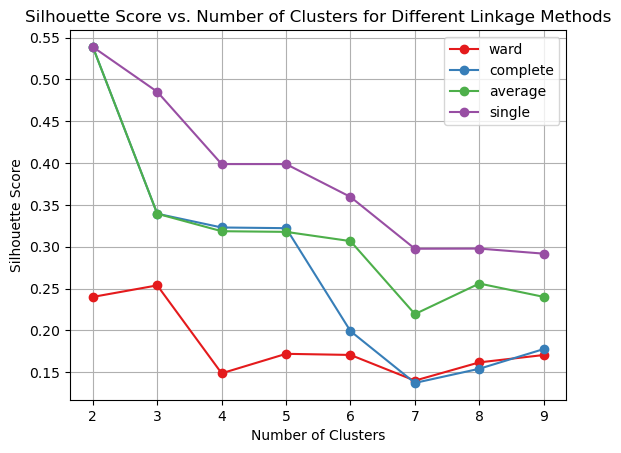

In [134]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
banyak_cluster = 2
AC = AgglomerativeClustering(n_clusters=banyak_cluster, linkage='average')
labels = AC.fit_predict(df_T)

df_train_with_labels = np.column_stack((df_T, labels))

centroids = []
for cluster_label in range(banyak_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)
centroids = np.array(centroids)

traces = []
colors = ['red', 'blue', 'green']

for cluster_label in range(banyak_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    trace = go.Scatter3d(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        z=cluster_data[:, 3],
        mode='markers',
        marker=dict(size=8, color=colors[cluster_label], opacity=0.8),
        name=f'Cluster {cluster_label + 1}'
    )
    traces.append(trace)

centroid_trace = go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 3],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

traces.append(centroid_trace)

layout = go.Layout(
    title='Hasil Agglomerative Clustering 3D',
    scene=dict(
        xaxis_title='County',
        yaxis_title='City',
        zaxis_title='Make'
    ),
    showlegend=True
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

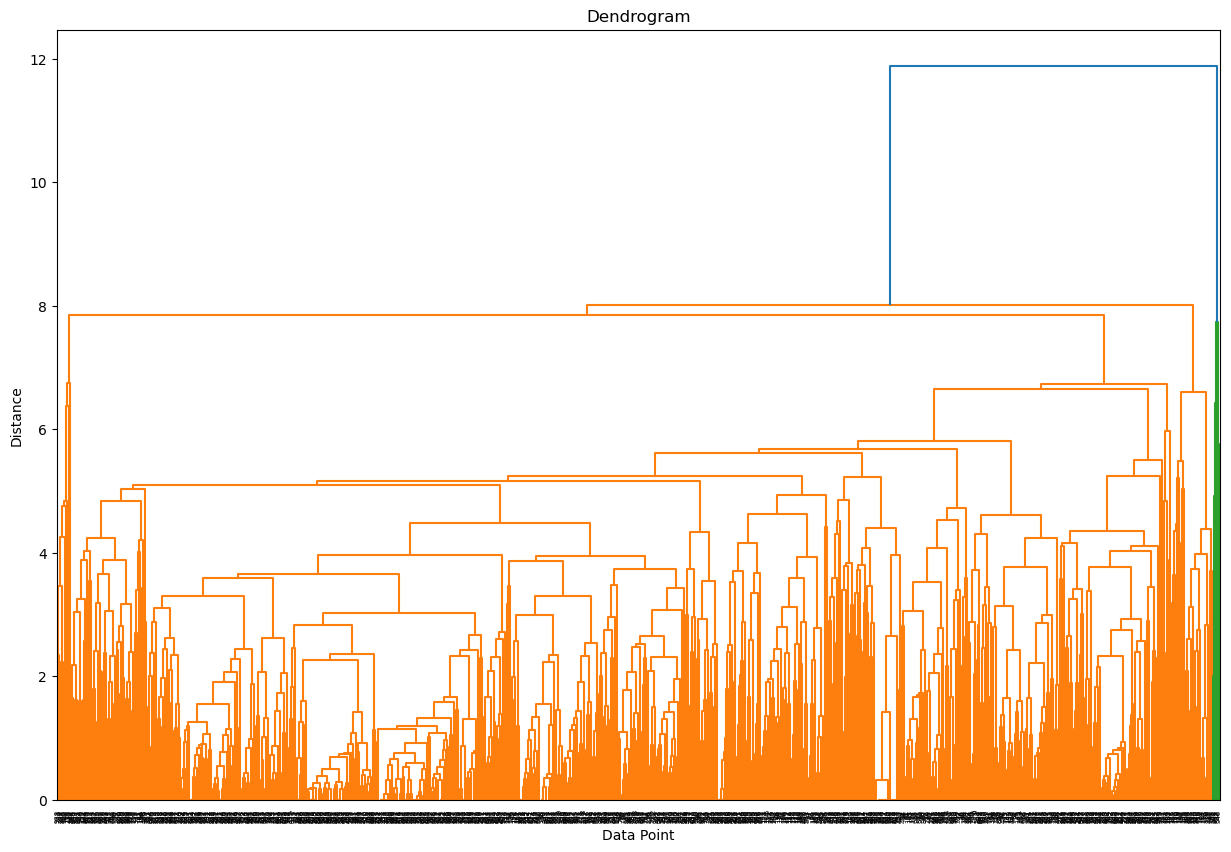

In [136]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(df_T, 'average')


plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.axhline(y=1500, color='black', linestyle='--') # at this point, will divide the data into 3 clusters
plt.show()

### 5. DBScan Clustering

In [137]:
epsilon = np.arange(0.1, 6, 0.1)
min_samples = range(1,26)

sil_avg = []
max_value = (0, 0, 0, -1)  # Inisialisasi nilai_maks dengan nilai negatif silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(df_T)

        # Periksa apakah ada setidaknya dua cluster
        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Jumlah cluster dalam label, mengabaikan noise jika ada
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(df_T, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

epsilon = 5.6 
min_samples = 4 
number of clusters = 1 
average silhouette score = 0.5389


In [138]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]

db=DBSCAN(eps=best_epsilon, min_samples=best_min_samples, metric='euclidean')
db.fit(df_T)
best_labels = db.labels_

unique_labels = np.unique(best_labels)
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'yellow']
cluster_colors = [colors[label % len(colors)] if label != -1 else 'black' for label in best_labels]

# Membuat scatter plot 3D menggunakan iloc
trace = go.Scatter3d(
    x=df_T.iloc[:, 0],  # PCA 1
    y=df_T.iloc[:, 1],  # PCA 2
    z=df_T.iloc[:, 3],  # PCA 3
    mode='markers',
    marker=dict(size=8, color=cluster_colors, opacity=0.8),
    text=[f'Cluster {label}' if label != -1 else 'Outlier' for label in best_labels],
    name='Data Points'
)

# Membuat layout
layout = go.Layout(
    title=f'Hasil DBSCAN Clustering (epsilon={best_epsilon}, min_samples={best_min_samples})',
    scene=dict(
        xaxis_title='County',
        yaxis_title='City',
        zaxis_title='Make'
    ),
    showlegend=False
)

# Menggabungkan semua trace
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan plot interaktif
fig.show()

### 6. Principal Component Analysis (PCA)

In [139]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_T)
pca_data = scaler.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=["PCA_1", "PCA_2"])  # Menggunakan "PCA_1" dan "PCA_2" karena kita hanya memiliki 2 komponen
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.166 0.128


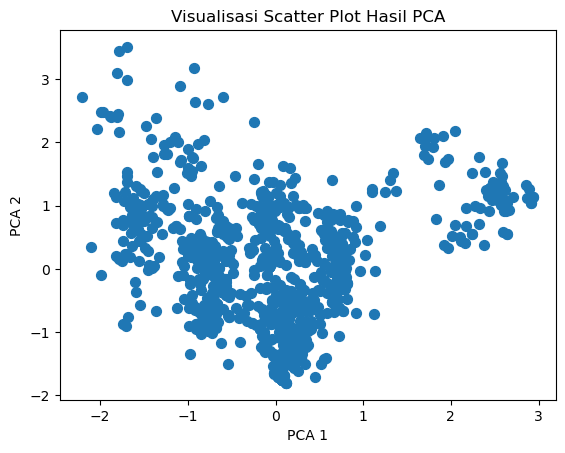

In [140]:
plt.scatter(pca_data["PCA_1"], pca_data["PCA_2"], s = 50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()